## Variational-Auto-Encoder

In [ ]:
import numpy as np
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.manifold import Isomap
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense

from scipy.stats import norm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras
from keras.datasets import mnist
from keras.layers import Input, Reshape, Conv2D, Conv2DTranspose, Flatten, Dense, Lambda
from keras.models import Model
from keras import metrics
from keras import backend as K
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense


In [ ]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

### Isomap

In [ ]:
import numpy as np
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.manifold import Isomap


# Load the dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Subset the dataset to reduce computation time
subset_size = 10000
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_subset, y_train_subset, test_size=0.2, random_state=42)

# Define the pipeline
pipe = Pipeline([
    ('isomap', Isomap()),
    ('knn', KNeighborsClassifier())
])

# Define the parameter grid for random search
param_grid = {
    'isomap__n_neighbors': [5, 10, 20],
    'isomap__n_components': [30, 50, 100],
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance']
}

# Perform random search
search = RandomizedSearchCV(pipe, param_distributions=param_grid, n_iter=10,
                            cv=3, verbose=2, random_state=42)
search.fit(X_train.reshape(len(X_train), -1), y_train.ravel())

# Print the best parameters and best score
print("Best parameters: ", search.best_params_)
print("Best score: ", search.best_score_)

# Evaluate the model on the test set
score = search.score(X_test.reshape(len(X_test), -1), y_test.ravel())
print("accuracy: ", score)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END isomap__n_components=50, isomap__n_neighbors=5, knn__n_neighbors=3, knn__weights=distance; total time=  35.4s
[CV] END isomap__n_components=50, isomap__n_neighbors=5, knn__n_neighbors=3, knn__weights=distance; total time=  36.0s
[CV] END isomap__n_components=50, isomap__n_neighbors=5, knn__n_neighbors=3, knn__weights=distance; total time=  35.2s
[CV] END isomap__n_components=100, isomap__n_neighbors=20, knn__n_neighbors=3, knn__weights=distance; total time=  43.1s
[CV] END isomap__n_components=100, isomap__n_neighbors=20, knn__n_neighbors=3, knn__weights=distance; total time=  43.1s
[CV] END isomap__n_components=100, isomap__n_neighbors=20, knn__n_neighbors=3, knn__weights=distance; total time=  43.3s
[CV] END isomap__n_components=100, isomap__n_neighbors=20, knn__n_neighbors=3, knn__weights=uniform; total time=  44.3s
[CV] END isomap__n_components=100, isomap__n_neighbors=20, knn__n_neighbors=3, knn__weights=uniform

In [ ]:
# Predict the labels of the test set using the best model
y_pred = search.predict(X_test.reshape(len(X_test), -1))

# Compute the standard deviation of the accuracy
std = np.std(y_pred == y_test.ravel())
print("Standard deviation:", std)

Standard deviation: 0.4149876986128625


In [ ]:
# Import the classification_report function
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test.ravel(), y_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      1000
           1       0.98      0.93      0.95      1000
           2       0.62      0.71      0.66      1000
           3       0.81      0.80      0.81      1000
           4       0.64      0.63      0.64      1000
           5       0.90      0.77      0.83      1000
           6       0.53      0.47      0.49      1000
           7       0.83      0.87      0.85      1000
           8       0.96      0.91      0.93      1000
           9       0.85      0.93      0.89      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



### PCA

In [ ]:
# Import libraries
import numpy as np
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA # Import PCA

# Load the dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# Subset the dataset to reduce computation time
#subset_size = 5000
X_train_subset = X_train#[:subset_size]
y_train_subset = y_train#[:subset_size]

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
X_train_subset, y_train_subset, test_size=0.2, random_state=42)

# Define the pipeline
pipe = Pipeline([
('pca', PCA()), # Replace Isomap with PCA
('knn', KNeighborsClassifier())
])

# Define the parameter grid for random search
param_grid = {
'pca__n_components': [30, 50, 100], # Number of principal components to keep
'pca__whiten': [True, False], # Whether to whiten the data
'knn__n_neighbors': [3, 5, 7],
'knn__weights': ['uniform', 'distance']
}

# Perform random search
search = RandomizedSearchCV(pipe, param_distributions=param_grid, n_iter=10,
cv=3, verbose=2, random_state=42)
search.fit(X_train.reshape(len(X_train), -1), y_train.ravel())

# Print the best parameters and best score
print("Best parameters: ", search.best_params_)
print("Best score: ", search.best_score_)

# Evaluate the model on the test set
score = search.score(X_test.reshape(len(X_test), -1), y_test.ravel())
print("accuracy: ", score)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END knn__n_neighbors=7, knn__weights=distance, pca__n_components=100, pca__whiten=False; total time=   9.2s
[CV] END knn__n_neighbors=7, knn__weights=distance, pca__n_components=100, pca__whiten=False; total time=  10.3s
[CV] END knn__n_neighbors=7, knn__weights=distance, pca__n_components=100, pca__whiten=False; total time=  10.7s
[CV] END knn__n_neighbors=5, knn__weights=uniform, pca__n_components=30, pca__whiten=False; total time=   6.7s
[CV] END knn__n_neighbors=5, knn__weights=uniform, pca__n_components=30, pca__whiten=False; total time=   5.9s
[CV] END knn__n_neighbors=5, knn__weights=uniform, pca__n_components=30, pca__whiten=False; total time=   6.7s
[CV] END knn__n_neighbors=7, knn__weights=uniform, pca__n_components=50, pca__whiten=True; total time=  10.3s
[CV] END knn__n_neighbors=7, knn__weights=uniform, pca__n_components=50, pca__whiten=True; total time=  12.9s
[CV] END knn__n_neighbors=7, knn__weights=unifo

In [ ]:
# Predict the labels of the test set using the best model
y_pred = search.predict(X_test.reshape(len(X_test), -1))

# Compute the standard deviation of the accuracy
std = np.std(y_pred == y_test.ravel())
print("Standard deviation:", std)

Standard deviation: 0.3497666507830614


In [ ]:
# Import the classification_report function
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test.ravel(), y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1000
           1       1.00      0.97      0.98      1000
           2       0.76      0.76      0.76      1000
           3       0.91      0.88      0.89      1000
           4       0.75      0.79      0.77      1000
           5       0.99      0.88      0.93      1000
           6       0.62      0.60      0.61      1000
           7       0.91      0.95      0.93      1000
           8       0.96      0.97      0.96      1000
           9       0.91      0.96      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



### PCA- n_iter = 60

In [ ]:
import numpy as np
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Load the dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

# Subset the dataset to reduce computation time
subset_size = 5000
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_subset, y_train_subset, test_size=0.2, random_state=42
)

# Define the pipeline
pipe = Pipeline([
    ('pca', PCA()),  # Replace Isomap with PCA
    ('knn', KNeighborsClassifier())
])

# Define the parameter grid for random search
param_grid = {
    'pca__n_components': [30, 50, 100],  # Number of principal components to keep
    'pca__whiten': [True, False],  # Whether to whiten the data
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance']
}

# Perform random search
search = RandomizedSearchCV(pipe, param_distributions=param_grid, n_iter=60,
                            cv=5, scoring='accuracy', verbose=2, random_state=42)
search.fit(X_train.reshape(len(X_train), -1), y_train.ravel())

# Print the best parameters and best score
print("Best parameters:", search.best_params_)
print("Best score:", search.best_score_)

# Evaluate the model on the test set
score = search.score(X_test.reshape(len(X_test), -1), y_test.ravel())
print("Accuracy:", score)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 36 is smaller than n_iter=60. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END knn__n_neighbors=3, knn__weights=uniform, pca__n_components=30, pca__whiten=True; total time=   0.6s
[CV] END knn__n_neighbors=3, knn__weights=uniform, pca__n_components=30, pca__whiten=True; total time=   0.6s
[CV] END knn__n_neighbors=3, knn__weights=uniform, pca__n_components=30, pca__whiten=True; total time=   0.5s
[CV] END knn__n_neighbors=3, knn__weights=uniform, pca__n_components=30, pca__whiten=True; total time=   0.9s
[CV] END knn__n_neighbors=3, knn__weights=uniform, pca__n_components=30, pca__whiten=True; total time=   0.8s
[CV] END knn__n_neighbors=3, knn__weights=uniform, pca__n_components=30, pca__whiten=False; total time=   0.7s
[CV] END knn__n_neighbors=3, knn__weights=uniform, pca__n_components=30, pca__whiten=False; total time=   1.0s
[CV] END knn__n_neighbors=3, knn__weights=uniform, pca__n_components=30, pca__whiten=False; total time=   1.3s
[CV] END knn__n_neighbors=3, knn__weights=uniform, pca_

In [ ]:
# Predict the labels of the test set using the best model
y_pred = search.predict(X_test.reshape(len(X_test), -1))

# Compute the standard deviation of the accuracy
std = np.std(y_pred == y_test.ravel())
print("Standard deviation:", std)

Standard deviation: 0.39269549271668497


In [ ]:
# Import the classification_report function
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test.ravel(), y_pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1000
           1       0.98      0.94      0.96      1000
           2       0.70      0.67      0.68      1000
           3       0.85      0.81      0.83      1000
           4       0.66      0.71      0.68      1000
           5       0.98      0.81      0.89      1000
           6       0.55      0.57      0.56      1000
           7       0.87      0.91      0.89      1000
           8       0.94      0.93      0.94      1000
           9       0.85      0.96      0.90      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



In [ ]:
import numpy as np
from tensorflow import keras
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense
# Load fashion_mnist dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Convert labels to one-hot encoding
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### dim = 2

In [ ]:
latent_dimension = 2 # latent dimensions

# Encoder
encoder_inputs = keras.layers.Input(shape=(28, 28, 1))
flatten_layer = keras.layers.Flatten()(encoder_inputs)
#1
dense_layer_1 = keras.layers.Dense(512, activation='relu')(flatten_layer)
dense_layer_1 = BatchNormalization () (dense_layer_1)
#2
dense_layer_2 = keras.layers.Dense(256, activation='relu')(dense_layer_1)
dense_layer_2 = BatchNormalization () (dense_layer_2)
#3
dense_layer_3 = keras.layers.Dense(128, activation='relu')(dense_layer_2)
dense_layer_3 = BatchNormalization () (dense_layer_3)
#4
dense_layer_4 = keras.layers.Dense(64, activation='relu')(dense_layer_3)
dense_layer_4 = BatchNormalization () (dense_layer_4)
#5
latent_space = keras.layers.Dense(latent_dimension, activation='relu')(dense_layer_4)
latent_space = BatchNormalization () (latent_space)

encoder_model2 = keras.models.Model(encoder_inputs, latent_space, name='encoder')
encoder_model2.summary()

# Decoder
latent_dim =  keras.layers.Input(shape=(latent_dimension, ))
dense_layer_6 = keras.layers.Dense(latent_dimension, activation='relu')(latent_dim)
dense_layer_6 = BatchNormalization () (dense_layer_6)
dense_layer_7 = keras.layers.Dense(64, activation='relu')(dense_layer_6)
dense_layer_7 = BatchNormalization () (dense_layer_7)
dense_layer_8 = keras.layers.Dense(128, activation='relu')(dense_layer_7)
dense_layer_8 = BatchNormalization () (dense_layer_8)
dense_layer_9 = keras.layers.Dense(256, activation='relu')(dense_layer_8)
dense_layer_9 = BatchNormalization () (dense_layer_9)
dense_layer_10 = keras.layers.Dense(512, activation='relu')(dense_layer_9)
dense_layer_10 = BatchNormalization () (dense_layer_10)

output_layer = keras.layers.Dense(28*28*1, activation='sigmoid')(dense_layer_10)
decoder_outputs = keras.layers.Reshape((28, 28, 1))(output_layer)

decoder_model2 = keras.models.Model(latent_dim, decoder_outputs, name='decoder')
decoder_model2.summary()

# Build the autoencoder model
outputs = decoder_model2(encoder_model2(encoder_inputs))

autoencoder2 = keras.models.Model(encoder_inputs, outputs)

# Compile the model
autoencoder2.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy','mse'])

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_20 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_23 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_21 (Bat  (None, 256)              1024      
 chNormalization)                                          

In [ ]:
history2 = autoencoder2.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

Epoch 1/10
469/469 [==============================] - 36s 39ms/step - loss: 0.4110 - accuracy: 0.4802 - mse: 0.0573 - val_loss: 0.3916 - val_accuracy: 0.4938 - val_mse: 0.0502
Epoch 2/10
469/469 [==============================] - 13s 28ms/step - loss: 0.3584 - accuracy: 0.4955 - mse: 0.0397 - val_loss: 0.3610 - val_accuracy: 0.4905 - val_mse: 0.0400
Epoch 3/10
469/469 [==============================] - 8s 18ms/step - loss: 0.3489 - accuracy: 0.4968 - mse: 0.0365 - val_loss: 0.3612 - val_accuracy: 0.4884 - val_mse: 0.0401
Epoch 4/10
469/469 [==============================] - 13s 28ms/step - loss: 0.3426 - accuracy: 0.4977 - mse: 0.0344 - val_loss: 0.3516 - val_accuracy: 0.4909 - val_mse: 0.0367
Epoch 5/10
469/469 [==============================] - 9s 19ms/step - loss: 0.3396 - accuracy: 0.4981 - mse: 0.0334 - val_loss: 0.3504 - val_accuracy: 0.4952 - val_mse: 0.0366
Epoch 6/10
469/469 [==============================] - 7s 15ms/step - loss: 0.3362 - accuracy: 0.4988 - mse: 0.0324 - val_l

In [ ]:
#encoder2 = keras.models.Model(encoder_inputs, latent_space)
x_train_encoded2 = encoder_model2.predict(x_train)
x_test_encoded2 = encoder_model2.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
k_values = [1,5]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
    knn.fit(x_train_encoded2, np.argmax(y_train, axis=1))
    acc = knn.score(x_test_encoded2, np.argmax(y_test, axis=1))
    std = np.std(knn.predict(x_test_encoded2) == np.argmax(y_test, axis=1))
    print(f'KNN (k={k}, latent_dimension={latent_dimension}): Accuracy = {acc:.4f}, Std = {std:.4f}')

KNN (k=1, latent_dimension=2): Accuracy = 0.6262, Std = 0.4838
KNN (k=5, latent_dimension=2): Accuracy = 0.6825, Std = 0.4655


In [ ]:
k_values = [1,3,5,7]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
    knn.fit(x_train_encoded2, np.argmax(y_train, axis=1))
    acc = knn.score(x_test_encoded2, np.argmax(y_test, axis=1))
    std = np.std(knn.predict(x_test_encoded2) == np.argmax(y_test, axis=1))
    print(f'KNN (k={k}, latent_dimension={latent_dimension}): Accuracy = {acc:.4f}, Std = {std:.4f}')

KNN (k=1, latent_dimension=2): Accuracy = 0.6262, Std = 0.4838
KNN (k=3, latent_dimension=2): Accuracy = 0.6654, Std = 0.4719
KNN (k=5, latent_dimension=2): Accuracy = 0.6825, Std = 0.4655
KNN (k=7, latent_dimension=2): Accuracy = 0.6918, Std = 0.4617


In [ ]:
from sklearn.metrics import classification_report
k_values = [1,3,5,7]
best_accuracy = 0
best_k = None
best_classification_report = None

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
    knn.fit(x_train_encoded2, np.argmax(y_train, axis=1))
    acc = knn.score(x_test_encoded2, np.argmax(y_test, axis=1))
    std = np.std(knn.predict(x_test_encoded2) == np.argmax(y_test, axis=1))

    # Classification report
    y_pred = knn.predict(x_test_encoded2)
    report = classification_report(np.argmax(y_test, axis=1), y_pred)

    if acc > best_accuracy:
        best_accuracy = acc
        best_k = k
        best_classification_report = report

    print(f'KNN (k={k}, latent_dimension={latent_dimension}): Accuracy = {acc:.4f}, Std = {std:.4f}')
    print('Classification Report:')
    print(report)

KNN (k=1, latent_dimension=2): Accuracy = 0.6262, Std = 0.4838
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.60      0.61      1000
           1       0.88      0.84      0.86      1000
           2       0.39      0.42      0.41      1000
           3       0.63      0.65      0.64      1000
           4       0.39      0.38      0.38      1000
           5       0.75      0.74      0.74      1000
           6       0.28      0.29      0.28      1000
           7       0.71      0.72      0.72      1000
           8       0.83      0.81      0.82      1000
           9       0.81      0.81      0.81      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000

KNN (k=3, latent_dimension=2): Accuracy = 0.6654, Std = 0.4719
Classification Report:
              precision    recall  f1-score   support

           0  

In [ ]:
print(f'Best Accuracy: {best_accuracy:.4f} achieved with K={best_k}')
print('Best Classification Report:')
print(best_classification_report)

Best Accuracy: 0.6918 achieved with K=7
Best Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.74      0.70      1000
           1       0.96      0.84      0.90      1000
           2       0.45      0.55      0.49      1000
           3       0.65      0.76      0.70      1000
           4       0.47      0.42      0.45      1000
           5       0.83      0.81      0.82      1000
           6       0.35      0.26      0.30      1000
           7       0.80      0.80      0.80      1000
           8       0.89      0.85      0.87      1000
           9       0.86      0.88      0.87      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



### latent space = 16 - Dense

In [ ]:
import numpy as np
from tensorflow import keras
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense
# Load fashion_mnist dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Convert labels to one-hot encoding
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
latent_dimension = 16 # Change this value to experiment with different latent dimensions

# Encoder
encoder_inputs = keras.layers.Input(shape=(28, 28, 1))
flatten_layer = keras.layers.Flatten()(encoder_inputs)
#1
dense_layer_1 = keras.layers.Dense(512, activation='relu')(flatten_layer)
dense_layer_1 = BatchNormalization () (dense_layer_1)
#2
dense_layer_2 = keras.layers.Dense(256, activation='relu')(dense_layer_1)
dense_layer_2 = BatchNormalization () (dense_layer_2)
#3
dense_layer_3 = keras.layers.Dense(128, activation='relu')(dense_layer_2)
dense_layer_3 = BatchNormalization () (dense_layer_3)
#4
dense_layer_4 = keras.layers.Dense(64, activation='relu')(dense_layer_3)
dense_layer_4 = BatchNormalization () (dense_layer_4)
#5
latent_space = keras.layers.Dense(latent_dimension, activation='relu')(dense_layer_4)
latent_space = BatchNormalization () (latent_space)

encoder_model = keras.models.Model(encoder_inputs, latent_space, name='encoder')
encoder_model.summary()

# Decoder
latent_dim =  keras.layers.Input(shape=(latent_dimension, ))
dense_layer_6 = keras.layers.Dense(latent_dimension, activation='relu')(latent_dim)
dense_layer_6 = BatchNormalization () (dense_layer_6)
dense_layer_7 = keras.layers.Dense(64, activation='relu')(dense_layer_6)
dense_layer_7 = BatchNormalization () (dense_layer_7)
dense_layer_8 = keras.layers.Dense(128, activation='relu')(dense_layer_7)
dense_layer_8 = BatchNormalization () (dense_layer_8)
dense_layer_9 = keras.layers.Dense(256, activation='relu')(dense_layer_8)
dense_layer_9 = BatchNormalization () (dense_layer_9)
dense_layer_10 = keras.layers.Dense(512, activation='relu')(dense_layer_9)
dense_layer_10 = BatchNormalization () (dense_layer_10)

output_layer = keras.layers.Dense(28*28*1, activation='sigmoid')(dense_layer_10)
decoder_outputs = keras.layers.Reshape((28, 28, 1))(output_layer)

decoder_model = keras.models.Model(latent_dim, decoder_outputs, name='decoder')
decoder_model.summary()

# Build the autoencoder model
outputs = decoder_model(encoder_model(encoder_inputs))
autoencoder = keras.models.Model(encoder_inputs, outputs)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy','mse'])

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_30 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_34 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_31 (Bat  (None, 256)              1024      
 chNormalization)                                          

In [ ]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (None, 16)                579344    
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         580384    
                                                                 
Total params: 1,159,728
Trainable params: 1,155,824
Non-trainable params: 3,904
_________________________________________________________________


In [ ]:
history = autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

Epoch 1/10
469/469 [==============================] - 20s 17ms/step - loss: 0.3523 - accuracy: 0.4917 - mse: 0.0362 - val_loss: 0.3129 - val_accuracy: 0.5002 - val_mse: 0.0230
Epoch 2/10
469/469 [==============================] - 7s 14ms/step - loss: 0.3029 - accuracy: 0.5050 - mse: 0.0207 - val_loss: 0.3010 - val_accuracy: 0.5029 - val_mse: 0.0192
Epoch 3/10
469/469 [==============================] - 11s 23ms/step - loss: 0.2972 - accuracy: 0.5058 - mse: 0.0188 - val_loss: 0.2956 - val_accuracy: 0.5037 - val_mse: 0.0175
Epoch 4/10
469/469 [==============================] - 13s 29ms/step - loss: 0.2936 - accuracy: 0.5063 - mse: 0.0176 - val_loss: 0.2959 - val_accuracy: 0.5034 - val_mse: 0.0175
Epoch 5/10
469/469 [==============================] - 10s 22ms/step - loss: 0.2916 - accuracy: 0.5065 - mse: 0.0169 - val_loss: 0.2927 - val_accuracy: 0.5038 - val_mse: 0.0167
Epoch 6/10
469/469 [==============================] - 11s 24ms/step - loss: 0.2900 - accuracy: 0.5067 - mse: 0.0164 - val

In [ ]:
#encoder = keras.models.Model(encoder_inputs, latent_space)
x_train_encoded = encoder_model.predict(x_train)
x_test_encoded = encoder_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
k_values = [1,5] #

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_encoded, np.argmax(y_train, axis=1))
    acc = knn.score(x_test_encoded, np.argmax(y_test, axis=1))
    std = np.std(knn.predict(x_test_encoded) == np.argmax(y_test, axis=1))
    print(f'KNN (k={k}, latent_dimension={latent_dimension}): Accuracy = {acc:.4f}, Std = {std:.4f}')

KNN (k=1, latent_dimension=16): Accuracy = 0.8145, Std = 0.3887
KNN (k=5, latent_dimension=16): Accuracy = 0.8411, Std = 0.3656


In [ ]:
k_values = [1,3,5,7]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_encoded, np.argmax(y_train, axis=1))
    acc = knn.score(x_test_encoded, np.argmax(y_test, axis=1))
    std = np.std(knn.predict(x_test_encoded) == np.argmax(y_test, axis=1))
    print(f'KNN (k={k}, latent_dimension={latent_dimension}): Accuracy = {acc:.4f}, Std = {std:.4f}')

KNN (k=1, latent_dimension=16): Accuracy = 0.8145, Std = 0.3887
KNN (k=3, latent_dimension=16): Accuracy = 0.8326, Std = 0.3733
KNN (k=5, latent_dimension=16): Accuracy = 0.8411, Std = 0.3656
KNN (k=7, latent_dimension=16): Accuracy = 0.8444, Std = 0.3625


In [ ]:
from sklearn.metrics import classification_report
k_values = [1,3,5,7]
best_accuracy = 0
best_k = None
best_classification_report = None

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_encoded, np.argmax(y_train, axis=1))
    acc = knn.score(x_test_encoded, np.argmax(y_test, axis=1))
    std = np.std(knn.predict(x_test_encoded) == np.argmax(y_test, axis=1))

    # Classification report
    y_pred = knn.predict(x_test_encoded)
    report = classification_report(np.argmax(y_test, axis=1), y_pred)

    if acc > best_accuracy:
        best_accuracy = acc
        best_k = k
        best_classification_report = report

    print(f'KNN (k={k}, latent_dimension={latent_dimension}): Accuracy = {acc:.4f}, Std = {std:.4f}')
    print('Classification Report:')
    print(report)


KNN (k=1, latent_dimension=16): Accuracy = 0.8145, Std = 0.3887
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1000
           1       0.97      0.95      0.96      1000
           2       0.69      0.69      0.69      1000
           3       0.84      0.85      0.84      1000
           4       0.70      0.70      0.70      1000
           5       0.91      0.89      0.90      1000
           6       0.55      0.55      0.55      1000
           7       0.87      0.90      0.88      1000
           8       0.96      0.95      0.96      1000
           9       0.91      0.91      0.91      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000

KNN (k=3, latent_dimension=16): Accuracy = 0.8326, Std = 0.3733
Classification Report:
              precision    recall  f1-score   support

           0

In [ ]:
print(f'Best Accuracy: {best_accuracy:.4f} achieved with K={best_k}')
print('Best Classification Report:')
print(best_classification_report)

Best Accuracy: 0.8444 achieved with K=7
Best Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1000
           1       0.98      0.95      0.97      1000
           2       0.73      0.76      0.75      1000
           3       0.87      0.87      0.87      1000
           4       0.74      0.75      0.75      1000
           5       0.94      0.88      0.91      1000
           6       0.64      0.57      0.61      1000
           7       0.88      0.92      0.90      1000
           8       0.96      0.97      0.96      1000
           9       0.92      0.94      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



### latent space = 32 - Dense

In [ ]:
import numpy as np
from tensorflow import keras
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense
# Load fashion_mnist dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Convert labels to one-hot encoding
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
latent_dimension = 32 #

# Encoder
encoder_inputs = keras.layers.Input(shape=(28, 28, 1))
flatten_layer = keras.layers.Flatten()(encoder_inputs)
#1
dense_layer_1 = keras.layers.Dense(512, activation='relu')(flatten_layer)
dense_layer_1 = BatchNormalization () (dense_layer_1)
#2
dense_layer_2 = keras.layers.Dense(256, activation='relu')(dense_layer_1)
dense_layer_2 = BatchNormalization () (dense_layer_2)
#3
dense_layer_3 = keras.layers.Dense(128, activation='relu')(dense_layer_2)
dense_layer_3 = BatchNormalization () (dense_layer_3)
#4
dense_layer_4 = keras.layers.Dense(64, activation='relu')(dense_layer_3)
dense_layer_4 = BatchNormalization () (dense_layer_4)
#5
latent_space = keras.layers.Dense(latent_dimension, activation='relu')(dense_layer_4)
latent_space = BatchNormalization () (latent_space)

encoder_model2 = keras.models.Model(encoder_inputs, latent_space, name='encoder')
encoder_model2.summary()

# Decoder
latent_dim =  keras.layers.Input(shape=(latent_dimension, ))
dense_layer_6 = keras.layers.Dense(latent_dimension, activation='relu')(latent_dim)
dense_layer_6 = BatchNormalization () (dense_layer_6)
dense_layer_7 = keras.layers.Dense(64, activation='relu')(dense_layer_6)
dense_layer_7 = BatchNormalization () (dense_layer_7)
dense_layer_8 = keras.layers.Dense(128, activation='relu')(dense_layer_7)
dense_layer_8 = BatchNormalization () (dense_layer_8)
dense_layer_9 = keras.layers.Dense(256, activation='relu')(dense_layer_8)
dense_layer_9 = BatchNormalization () (dense_layer_9)
dense_layer_10 = keras.layers.Dense(512, activation='relu')(dense_layer_9)
dense_layer_10 = BatchNormalization () (dense_layer_10)

output_layer = keras.layers.Dense(28*28*1, activation='sigmoid')(dense_layer_10)
decoder_outputs = keras.layers.Reshape((28, 28, 1))(output_layer)

decoder_model2 = keras.models.Model(latent_dim, decoder_outputs, name='decoder')
decoder_model2.summary()

# Build the autoencoder model
outputs = decoder_model2(encoder_model2(encoder_inputs))
autoencoder2 = keras.models.Model(encoder_inputs, outputs)

# Compile the model
autoencoder2.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy','mse'])

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_44 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_40 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_45 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_41 (Bat  (None, 256)              1024      
 chNormalization)                                          

In [ ]:
history2 = autoencoder2.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

Epoch 1/10
469/469 [==============================] - 15s 16ms/step - loss: 0.3491 - accuracy: 0.4926 - mse: 0.0350 - val_loss: 0.3112 - val_accuracy: 0.5009 - val_mse: 0.0222
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.2994 - accuracy: 0.5056 - mse: 0.0194 - val_loss: 0.3082 - val_accuracy: 0.5023 - val_mse: 0.0212
Epoch 3/10
469/469 [==============================] - 9s 19ms/step - loss: 0.2945 - accuracy: 0.5062 - mse: 0.0178 - val_loss: 0.2978 - val_accuracy: 0.5034 - val_mse: 0.0181
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 0.2914 - accuracy: 0.5066 - mse: 0.0168 - val_loss: 0.2922 - val_accuracy: 0.5043 - val_mse: 0.0163
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 0.2891 - accuracy: 0.5069 - mse: 0.0161 - val_loss: 0.2894 - val_accuracy: 0.5046 - val_mse: 0.0154
Epoch 6/10
469/469 [==============================] - 7s 15ms/step - loss: 0.2872 - accuracy: 0.5071 - mse: 0.0154 - val_los

In [ ]:
#encoder2 = keras.models.Model(encoder_inputs, latent_space)
x_train_encoded2 = encoder_model2.predict(x_train)
x_test_encoded2 = encoder_model2.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
k_values = [1,5] # Change this list to experiment with different k values

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_encoded2, np.argmax(y_train, axis=1))
    acc = knn.score(x_test_encoded2, np.argmax(y_test, axis=1))
    std = np.std(knn.predict(x_test_encoded2) == np.argmax(y_test, axis=1))
    print(f'KNN (k={k}, latent_dimension={latent_dimension}): Accuracy = {acc:.4f}, Std = {std:.4f}')

KNN (k=1, latent_dimension=32): Accuracy = 0.8366, Std = 0.3697
KNN (k=5, latent_dimension=32): Accuracy = 0.8561, Std = 0.3510


In [ ]:
k_values = [1,3,5,7]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_encoded, np.argmax(y_train, axis=1))
    acc = knn.score(x_test_encoded, np.argmax(y_test, axis=1))
    std = np.std(knn.predict(x_test_encoded) == np.argmax(y_test, axis=1))
    print(f'KNN (k={k}, latent_dimension={latent_dimension}): Accuracy = {acc:.4f}, Std = {std:.4f}')

KNN (k=1, latent_dimension=32): Accuracy = 0.8145, Std = 0.3887
KNN (k=3, latent_dimension=32): Accuracy = 0.8326, Std = 0.3733
KNN (k=5, latent_dimension=32): Accuracy = 0.8411, Std = 0.3656
KNN (k=7, latent_dimension=32): Accuracy = 0.8444, Std = 0.3625


In [ ]:
from sklearn.metrics import classification_report

k_values = [1,3,5,7]
best_accuracy = 0
best_k = None
best_classification_report = None

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_encoded, np.argmax(y_train, axis=1))
    acc = knn.score(x_test_encoded, np.argmax(y_test, axis=1))
    std = np.std(knn.predict(x_test_encoded) == np.argmax(y_test, axis=1))

    # Classification report
    y_pred = knn.predict(x_test_encoded)
    report = classification_report(np.argmax(y_test, axis=1), y_pred)

    if acc > best_accuracy:
        best_accuracy = acc
        best_k = k
        best_classification_report = report

    print(f'KNN (k={k}, latent_dimension={latent_dimension}): Accuracy = {acc:.4f}, Std = {std:.4f}')
    print('Classification Report:')
    print(report)


KNN (k=1, latent_dimension=32): Accuracy = 0.8145, Std = 0.3887
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1000
           1       0.97      0.95      0.96      1000
           2       0.69      0.69      0.69      1000
           3       0.84      0.85      0.84      1000
           4       0.70      0.70      0.70      1000
           5       0.91      0.89      0.90      1000
           6       0.55      0.55      0.55      1000
           7       0.87      0.90      0.88      1000
           8       0.96      0.95      0.96      1000
           9       0.91      0.91      0.91      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000

KNN (k=3, latent_dimension=32): Accuracy = 0.8326, Std = 0.3733
Classification Report:
              precision    recall  f1-score   support

           0

In [ ]:
print(f'Best Accuracy: {best_accuracy:.4f} achieved with K={best_k}')
print('Best Classification Report:')
print(best_classification_report)

Best Accuracy: 0.8444 achieved with K=7
Best Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1000
           1       0.98      0.95      0.97      1000
           2       0.73      0.76      0.75      1000
           3       0.87      0.87      0.87      1000
           4       0.74      0.75      0.75      1000
           5       0.94      0.88      0.91      1000
           6       0.64      0.57      0.61      1000
           7       0.88      0.92      0.90      1000
           8       0.96      0.97      0.96      1000
           9       0.92      0.94      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



### latent space = 2 - Conv

In [ ]:
# conv
import numpy as np
from tensorflow import keras
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense
# Load fashion_mnist dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Convert labels to one-hot encoding
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
latent_dimension = 2 # Change this value to experiment with different latent dimensions

# Encoder
encoder_inputs = keras.layers.Input(shape=(28, 28, 1))
#1
dense_layer_1 = keras.layers.Conv2D(512,(3, 3), activation='relu', padding='same')(encoder_inputs)
dense_layer_1 = BatchNormalization () (dense_layer_1)
#2
dense_layer_2 = keras.layers.Conv2D(256,(3, 3), activation='relu', padding='same')(dense_layer_1)
dense_layer_2 = BatchNormalization () (dense_layer_2)
#3
dense_layer_3 = keras.layers.Conv2D(128,(3, 3), activation='relu', padding='same')(dense_layer_2)
dense_layer_3 = BatchNormalization () (dense_layer_3)
#4
dense_layer_4 = keras.layers.Conv2D(64,(3, 3), activation='relu', padding='same')(dense_layer_3)
dense_layer_4 = BatchNormalization () (dense_layer_4)
#5
dense_layer_5 = keras.layers.Conv2D(32,(3, 3), activation='relu', padding='same')(dense_layer_4)
dense_layer_5 = BatchNormalization () (dense_layer_5)

flatten_layer = keras.layers.Flatten()(dense_layer_5)
latent_space = keras.layers.Dense(latent_dimension, activation='relu')(flatten_layer)

# Decoder
dense_layer_6 = keras.layers.Dense(28 * 28 * 1, activation='relu')(latent_space)
reshape_layer = keras.layers.Reshape((28, 28, 1))(dense_layer_6)

dense_layer_7 = keras.layers.Conv2DTranspose(32,(3, 3), activation='relu', padding='same')(reshape_layer)
dense_layer_7 = BatchNormalization () (dense_layer_7)
dense_layer_8 = keras.layers.Conv2DTranspose(64,(3, 3), activation='relu', padding='same')(dense_layer_7)
dense_layer_8 = BatchNormalization () (dense_layer_8)
dense_layer_9 = keras.layers.Conv2DTranspose(128,(3, 3), activation='relu', padding='same')(dense_layer_8)
dense_layer_9 = BatchNormalization () (dense_layer_9)
dense_layer_10 = keras.layers.Conv2DTranspose(256,(3, 3), activation='relu', padding='same')(dense_layer_9)
dense_layer_10 = BatchNormalization () (dense_layer_10)
dense_layer_11 = keras.layers.Conv2DTranspose(512,(3, 3), activation='relu', padding='same')(dense_layer_10)
decoder_outputs = BatchNormalization () (dense_layer_11)

decoder_outputs = keras.layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(decoder_outputs)


# Build the autoencoder model
autoencoder4 = keras.models.Model(encoder_inputs, decoder_outputs)

# Compile the model
autoencoder4.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy','mse'])

In [ ]:
history4 = autoencoder4.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

Epoch 1/10
469/469 [==============================] - 152s 282ms/step - loss: 0.4063 - accuracy: 0.4877 - mse: 0.0495 - val_loss: 0.7333 - val_accuracy: 0.2871 - val_mse: 0.1843
Epoch 2/10
469/469 [==============================] - 127s 271ms/step - loss: 0.3403 - accuracy: 0.4979 - mse: 0.0340 - val_loss: 0.3384 - val_accuracy: 0.4965 - val_mse: 0.0327
Epoch 3/10
469/469 [==============================] - 123s 263ms/step - loss: 0.3357 - accuracy: 0.4987 - mse: 0.0324 - val_loss: 0.3372 - val_accuracy: 0.4968 - val_mse: 0.0322
Epoch 4/10
469/469 [==============================] - 127s 271ms/step - loss: 0.3332 - accuracy: 0.4991 - mse: 0.0316 - val_loss: 0.3321 - val_accuracy: 0.4987 - val_mse: 0.0304
Epoch 5/10
469/469 [==============================] - 127s 271ms/step - loss: 0.3315 - accuracy: 0.4993 - mse: 0.0310 - val_loss: 0.3497 - val_accuracy: 0.4982 - val_mse: 0.0359
Epoch 6/10
469/469 [==============================] - 123s 262ms/step - loss: 0.3303 - accuracy: 0.4995 - mse:

In [ ]:
encoder4 = keras.models.Model(encoder_inputs, latent_space)
x_train_encoded4 = encoder4.predict(x_train)
x_test_encoded4 = encoder4.predict(x_test)

313/313 [==============================] - 3s 9ms/step


In [ ]:
k_values = [1,3,5,7] # Change this list to experiment with different k values

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_encoded4, np.argmax(y_train, axis=1))
    acc = knn.score(x_test_encoded4, np.argmax(y_test, axis=1))
    std = np.std(knn.predict(x_test_encoded4) == np.argmax(y_test, axis=1))
    print(f'KNN (k={k}, latent_dimension={latent_dimension}): Accuracy = {acc:.4f}, Std = {std:.4f}')

KNN (k=1, latent_dimension=2): Accuracy = 0.6114, Std = 0.4874
KNN (k=3, latent_dimension=2): Accuracy = 0.6422, Std = 0.4794
KNN (k=5, latent_dimension=2): Accuracy = 0.6614, Std = 0.4732
KNN (k=7, latent_dimension=2): Accuracy = 0.6716, Std = 0.4696


In [ ]:
from sklearn.metrics import classification_report
k_values = [1,3,5,7]
best_accuracy = 0
best_k = None
best_classification_report = None

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_encoded4, np.argmax(y_train, axis=1))
    acc = knn.score(x_test_encoded4, np.argmax(y_test, axis=1))
    std = np.std(knn.predict(x_test_encoded4) == np.argmax(y_test, axis=1))

    # Classification report
    y_pred = knn.predict(x_test_encoded4)
    report = classification_report(np.argmax(y_test, axis=1), y_pred)

    if acc > best_accuracy:
        best_accuracy = acc
        best_k = k
        best_classification_report = report

    print(f'KNN (k={k}, latent_dimension={latent_dimension}): Accuracy = {acc:.4f}, Std = {std:.4f}')
    print('Classification Report:')
    print(report)


KNN (k=1, latent_dimension=2): Accuracy = 0.6114, Std = 0.4874
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.57      0.57      1000
           1       0.81      0.79      0.80      1000
           2       0.38      0.38      0.38      1000
           3       0.57      0.56      0.57      1000
           4       0.36      0.37      0.36      1000
           5       0.79      0.77      0.78      1000
           6       0.25      0.25      0.25      1000
           7       0.74      0.76      0.75      1000
           8       0.84      0.85      0.85      1000
           9       0.82      0.82      0.82      1000

    accuracy                           0.61     10000
   macro avg       0.61      0.61      0.61     10000
weighted avg       0.61      0.61      0.61     10000

KNN (k=3, latent_dimension=2): Accuracy = 0.6422, Std = 0.4794
Classification Report:
              precision    recall  f1-score   support

           0  

In [ ]:
print(f'Best Accuracy: {best_accuracy:.4f} achieved with K={best_k}')
print('Best Classification Report:')
print(best_classification_report)


Best Accuracy: 0.6716 achieved with K=7
Best Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.74      0.66      1000
           1       0.88      0.83      0.86      1000
           2       0.40      0.51      0.45      1000
           3       0.62      0.65      0.63      1000
           4       0.44      0.39      0.41      1000
           5       0.84      0.82      0.83      1000
           6       0.33      0.21      0.26      1000
           7       0.81      0.81      0.81      1000
           8       0.90      0.89      0.89      1000
           9       0.85      0.88      0.86      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



### latent space = 16 - Conv

In [ ]:
# conv
import numpy as np
from tensorflow import keras
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense
# Load fashion_mnist dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Convert labels to one-hot encoding
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
latent_dimension = 16 # Change this value to experiment with different latent dimensions

# Encoder
encoder_inputs = keras.layers.Input(shape=(28, 28, 1))
#1
dense_layer_1 = keras.layers.Conv2D(512,(3, 3), activation='relu', padding='same')(encoder_inputs)
dense_layer_1 = BatchNormalization () (dense_layer_1)
#2
dense_layer_2 = keras.layers.Conv2D(256,(3, 3), activation='relu', padding='same')(dense_layer_1)
dense_layer_2 = BatchNormalization () (dense_layer_2)
#3
dense_layer_3 = keras.layers.Conv2D(128,(3, 3), activation='relu', padding='same')(dense_layer_2)
dense_layer_3 = BatchNormalization () (dense_layer_3)
#4
dense_layer_4 = keras.layers.Conv2D(64,(3, 3), activation='relu', padding='same')(dense_layer_3)
dense_layer_4 = BatchNormalization () (dense_layer_4)
#5
dense_layer_5 = keras.layers.Conv2D(32,(3, 3), activation='relu', padding='same')(dense_layer_4)
dense_layer_5 = BatchNormalization () (dense_layer_5)

flatten_layer = keras.layers.Flatten()(dense_layer_5)
latent_space = keras.layers.Dense(latent_dimension, activation='relu')(flatten_layer)

# Decoder
dense_layer_6 = keras.layers.Dense(28 * 28 * 1, activation='relu')(latent_space)
reshape_layer = keras.layers.Reshape((28, 28, 1))(dense_layer_6)

dense_layer_7 = keras.layers.Conv2DTranspose(32,(3, 3), activation='relu', padding='same')(reshape_layer)
dense_layer_7 = BatchNormalization () (dense_layer_7)
dense_layer_8 = keras.layers.Conv2DTranspose(64,(3, 3), activation='relu', padding='same')(dense_layer_7)
dense_layer_8 = BatchNormalization () (dense_layer_8)
dense_layer_9 = keras.layers.Conv2DTranspose(128,(3, 3), activation='relu', padding='same')(dense_layer_8)
dense_layer_9 = BatchNormalization () (dense_layer_9)
dense_layer_10 = keras.layers.Conv2DTranspose(256,(3, 3), activation='relu', padding='same')(dense_layer_9)
dense_layer_10 = BatchNormalization () (dense_layer_10)
dense_layer_11 = keras.layers.Conv2DTranspose(512,(3, 3), activation='relu', padding='same')(dense_layer_10)
decoder_outputs = BatchNormalization () (dense_layer_11)

decoder_outputs = keras.layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(decoder_outputs)

# Build the autoencoder model
autoencoder3 = keras.models.Model(encoder_inputs, decoder_outputs)

# Compile the model
autoencoder3.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy','mse'])

In [ ]:

history3 = autoencoder3.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))


Epoch 1/10
469/469 [==============================] - 135s 263ms/step - loss: 0.3501 - accuracy: 0.4975 - mse: 0.0319 - val_loss: 0.5046 - val_accuracy: 0.5000 - val_mse: 0.0924
Epoch 2/10
469/469 [==============================] - 122s 261ms/step - loss: 0.2906 - accuracy: 0.5066 - mse: 0.0166 - val_loss: 0.2875 - val_accuracy: 0.5044 - val_mse: 0.0149
Epoch 3/10
469/469 [==============================] - 126s 269ms/step - loss: 0.2849 - accuracy: 0.5073 - mse: 0.0147 - val_loss: 0.2941 - val_accuracy: 0.5040 - val_mse: 0.0175
Epoch 4/10
469/469 [==============================] - 126s 269ms/step - loss: 0.2802 - accuracy: 0.5077 - mse: 0.0132 - val_loss: 0.2869 - val_accuracy: 0.5044 - val_mse: 0.0150
Epoch 5/10
469/469 [==============================] - 126s 270ms/step - loss: 0.2774 - accuracy: 0.5079 - mse: 0.0123 - val_loss: 0.2779 - val_accuracy: 0.5056 - val_mse: 0.0118
Epoch 6/10
469/469 [==============================] - 126s 269ms/step - loss: 0.2756 - accuracy: 0.5080 - mse:

In [ ]:
encoder3 = keras.models.Model(encoder_inputs, latent_space)
x_train_encoded3 = encoder3.predict(x_train)
x_test_encoded3 = encoder3.predict(x_test)

313/313 [==============================] - 3s 9ms/step


In [ ]:
k_values = [1,3,5,7] # Change this list to experiment with different k values

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_encoded3, np.argmax(y_train, axis=1))
    acc = knn.score(x_test_encoded3, np.argmax(y_test, axis=1))
    std = np.std(knn.predict(x_test_encoded3) == np.argmax(y_test, axis=1))
    print(f'KNN (k={k}, latent_dimension={latent_dimension}): Accuracy = {acc:.4f}, Std = {std:.4f}')

KNN (k=1, latent_dimension=16): Accuracy = 0.8546, Std = 0.3525
KNN (k=3, latent_dimension=16): Accuracy = 0.8642, Std = 0.3426
KNN (k=5, latent_dimension=16): Accuracy = 0.8694, Std = 0.3370
KNN (k=7, latent_dimension=16): Accuracy = 0.8674, Std = 0.3391


In [ ]:
from sklearn.metrics import classification_report
k_values = [1,3,5,7]
best_accuracy = 0
best_k = None
best_classification_report = None

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_encoded3, np.argmax(y_train, axis=1))
    acc = knn.score(x_test_encoded3, np.argmax(y_test, axis=1))
    std = np.std(knn.predict(x_test_encoded3) == np.argmax(y_test, axis=1))

    # Classification report
    y_pred = knn.predict(x_test_encoded3)
    report = classification_report(np.argmax(y_test, axis=1), y_pred)

    if acc > best_accuracy:
        best_accuracy = acc
        best_k = k
        best_classification_report = report

    print(f'KNN (k={k}, latent_dimension={latent_dimension}): Accuracy = {acc:.4f}, Std = {std:.4f}')
    print('Classification Report:')
    print(report)


KNN (k=1, latent_dimension=16): Accuracy = 0.8546, Std = 0.3525
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1000
           1       0.98      0.97      0.97      1000
           2       0.74      0.75      0.74      1000
           3       0.88      0.86      0.87      1000
           4       0.74      0.73      0.74      1000
           5       0.97      0.92      0.95      1000
           6       0.61      0.65      0.63      1000
           7       0.93      0.96      0.94      1000
           8       0.98      0.97      0.98      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.86     10000
weighted avg       0.86      0.85      0.86     10000

KNN (k=3, latent_dimension=16): Accuracy = 0.8642, Std = 0.3426
Classification Report:
              precision    recall  f1-score   support

           0

In [ ]:
print(f'Best Accuracy: {best_accuracy:.4f} achieved with K={best_k}')
print('Best Classification Report:')
print(best_classification_report)


Best Accuracy: 0.8694 achieved with K=5
Best Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.76      0.78      0.77      1000
           3       0.89      0.89      0.89      1000
           4       0.77      0.78      0.78      1000
           5       0.99      0.91      0.95      1000
           6       0.68      0.61      0.64      1000
           7       0.91      0.97      0.94      1000
           8       0.98      0.97      0.98      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



### latent space = 32 - Conv

In [ ]:
# conv
import numpy as np
from tensorflow import keras
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense
# Load fashion_mnist dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Convert labels to one-hot encoding
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
latent_dimension = 32 # Change this value to experiment with different latent dimensions

# Encoder
encoder_inputs = keras.layers.Input(shape=(28, 28, 1))
#1
dense_layer_1 = keras.layers.Conv2D(512,(3, 3), activation='relu', padding='same')(encoder_inputs)
dense_layer_1 = BatchNormalization () (dense_layer_1)
#2
dense_layer_2 = keras.layers.Conv2D(256,(3, 3), activation='relu', padding='same')(dense_layer_1)
dense_layer_2 = BatchNormalization () (dense_layer_2)
#3
dense_layer_3 = keras.layers.Conv2D(128,(3, 3), activation='relu', padding='same')(dense_layer_2)
dense_layer_3 = BatchNormalization () (dense_layer_3)
#4
dense_layer_4 = keras.layers.Conv2D(64,(3, 3), activation='relu', padding='same')(dense_layer_3)
dense_layer_4 = BatchNormalization () (dense_layer_4)
#5
dense_layer_5 = keras.layers.Conv2D(32,(3, 3), activation='relu', padding='same')(dense_layer_4)
dense_layer_5 = BatchNormalization () (dense_layer_5)

flatten_layer = keras.layers.Flatten()(dense_layer_5)
latent_space = keras.layers.Dense(latent_dimension, activation='relu')(flatten_layer)

# Decoder
dense_layer_6 = keras.layers.Dense(28 * 28 * 1, activation='relu')(latent_space)
reshape_layer = keras.layers.Reshape((28, 28, 1))(dense_layer_6)

dense_layer_7 = keras.layers.Conv2DTranspose(32,(3, 3), activation='relu', padding='same')(reshape_layer)
dense_layer_7 = BatchNormalization () (dense_layer_7)
dense_layer_8 = keras.layers.Conv2DTranspose(64,(3, 3), activation='relu', padding='same')(dense_layer_7)
dense_layer_8 = BatchNormalization () (dense_layer_8)
dense_layer_9 = keras.layers.Conv2DTranspose(128,(3, 3), activation='relu', padding='same')(dense_layer_8)
dense_layer_9 = BatchNormalization () (dense_layer_9)
dense_layer_10 = keras.layers.Conv2DTranspose(256,(3, 3), activation='relu', padding='same')(dense_layer_9)
dense_layer_10 = BatchNormalization () (dense_layer_10)
dense_layer_11 = keras.layers.Conv2DTranspose(512,(3, 3), activation='relu', padding='same')(dense_layer_10)
decoder_outputs = BatchNormalization () (dense_layer_11)

decoder_outputs = keras.layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(decoder_outputs)


# Build the autoencoder model
autoencoder4 = keras.models.Model(encoder_inputs, decoder_outputs)

# Compile the model
autoencoder4.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy','mse'])

In [ ]:
history4 = autoencoder4.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

Epoch 1/10
469/469 [==============================] - 131s 263ms/step - loss: 0.3449 - accuracy: 0.4990 - mse: 0.0301 - val_loss: 0.4814 - val_accuracy: 0.5000 - val_mse: 0.0864
Epoch 2/10
469/469 [==============================] - 127s 270ms/step - loss: 0.2856 - accuracy: 0.5073 - mse: 0.0149 - val_loss: 0.2829 - val_accuracy: 0.5055 - val_mse: 0.0135
Epoch 3/10
469/469 [==============================] - 127s 271ms/step - loss: 0.2780 - accuracy: 0.5081 - mse: 0.0124 - val_loss: 0.2831 - val_accuracy: 0.5049 - val_mse: 0.0138
Epoch 4/10
469/469 [==============================] - 127s 270ms/step - loss: 0.2746 - accuracy: 0.5084 - mse: 0.0112 - val_loss: 0.2836 - val_accuracy: 0.5055 - val_mse: 0.0136
Epoch 5/10
469/469 [==============================] - 123s 262ms/step - loss: 0.2710 - accuracy: 0.5087 - mse: 0.0100 - val_loss: 0.2824 - val_accuracy: 0.5060 - val_mse: 0.0121
Epoch 6/10
469/469 [==============================] - 127s 271ms/step - loss: 0.2692 - accuracy: 0.5088 - mse:

In [ ]:
encoder4 = keras.models.Model(encoder_inputs, latent_space)
x_train_encoded4 = encoder4.predict(x_train)
x_test_encoded4 = encoder4.predict(x_test)

313/313 [==============================] - 3s 9ms/step


In [ ]:
k_values = [1,3,5,7] # Change this list to experiment with different k values

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_encoded4, np.argmax(y_train, axis=1))
    acc = knn.score(x_test_encoded4, np.argmax(y_test, axis=1))
    std = np.std(knn.predict(x_test_encoded4) == np.argmax(y_test, axis=1))
    print(f'KNN (k={k}, latent_dimension={latent_dimension}): Accuracy = {acc:.4f}, Std = {std:.4f}')

KNN (k=1, latent_dimension=32): Accuracy = 0.8670, Std = 0.3396
KNN (k=3, latent_dimension=32): Accuracy = 0.8730, Std = 0.3330
KNN (k=5, latent_dimension=32): Accuracy = 0.8794, Std = 0.3257
KNN (k=7, latent_dimension=32): Accuracy = 0.8783, Std = 0.3269


In [ ]:
from sklearn.metrics import classification_report
k_values = [1,3,5,7]
best_accuracy = 0
best_k = None
best_classification_report = None

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_encoded4, np.argmax(y_train, axis=1))
    acc = knn.score(x_test_encoded4, np.argmax(y_test, axis=1))
    std = np.std(knn.predict(x_test_encoded4) == np.argmax(y_test, axis=1))

    # Classification report
    y_pred = knn.predict(x_test_encoded4)
    report = classification_report(np.argmax(y_test, axis=1), y_pred)

    if acc > best_accuracy:
        best_accuracy = acc
        best_k = k
        best_classification_report = report

    print(f'KNN (k={k}, latent_dimension={latent_dimension}): Accuracy = {acc:.4f}, Std = {std:.4f}')
    print('Classification Report:')
    print(report)


KNN (k=1, latent_dimension=32): Accuracy = 0.8670, Std = 0.3396
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1000
           1       0.99      0.98      0.98      1000
           2       0.77      0.78      0.77      1000
           3       0.89      0.87      0.88      1000
           4       0.76      0.76      0.76      1000
           5       0.98      0.94      0.96      1000
           6       0.64      0.65      0.65      1000
           7       0.93      0.95      0.94      1000
           8       0.98      0.98      0.98      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

KNN (k=3, latent_dimension=32): Accuracy = 0.8730, Std = 0.3330
Classification Report:
              precision    recall  f1-score   support

           0

In [ ]:
print(f'Best Accuracy: {best_accuracy:.4f} achieved with K={best_k}')
print('Best Classification Report:')
print(best_classification_report)


Best Accuracy: 0.8794 achieved with K=5
Best Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.76      0.82      0.79      1000
           3       0.90      0.90      0.90      1000
           4       0.79      0.80      0.79      1000
           5       0.99      0.93      0.96      1000
           6       0.71      0.63      0.67      1000
           7       0.92      0.97      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.95      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000




### latent_dim = 2 -Dense

In [ ]:
original_dim = 28 * 28 #28
intermediate_dim = 64
latent_dim = 2
batch_size=32
inputs = keras.Input(shape=(original_dim,))
h1 = layers.Dense(512, activation='relu')(inputs)
h1 = BatchNormalization () (h1)
h2 = layers.Dense(256, activation='relu')(h1)
h2 = BatchNormalization () (h2)
h3 = layers.Dense(128, activation='relu')(h2)
h3 = BatchNormalization () (h3)
h4 = layers.Dense(64, activation='relu')(h3)
h4 = BatchNormalization () (h4)
h = layers.Dense(32, activation='relu')(h4)
h = BatchNormalization () (h)

z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [ ]:
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [ ]:
# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')

x1 = layers.Dense(32, activation='relu')(latent_inputs)
x1 = BatchNormalization () (x1)
x2 = layers.Dense(64, activation='relu')(x1)
x2 = BatchNormalization () (x2)
x3 = layers.Dense(128, activation='relu')(x2)
x3 = BatchNormalization () (x3)
x4 = layers.Dense(256, activation='relu')(x3)
x4 = BatchNormalization () (x4)
x = layers.Dense(512, activation='relu')(x4)
x = BatchNormalization () (x)

outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [ ]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam',metrics=['accuracy','mse'])

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

historyvae = vae.fit(x_train, x_train,epochs=10,batch_size=32,validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 36s 14ms/step - loss: 284.4086 - accuracy: 0.0113 - mse: 0.0401 - val_loss: 264.1829 - val_accuracy: 0.0137 - val_mse: 0.0313
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 268.4912 - accuracy: 0.0129 - mse: 0.0338 - val_loss: 261.0912 - val_accuracy: 0.0134 - val_mse: 0.0301
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 265.6550 - accuracy: 0.0137 - mse: 0.0326 - val_loss: 261.1189 - val_accuracy: 0.0185 - val_mse: 0.0300
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 265.0103 - accuracy: 0.0149 - mse: 0.0323 - val_loss: 266.6415 - val_accuracy: 0.0123 - val_mse: 0.0325
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 263.9619 - accuracy: 0.0139 - mse: 0.0319 - val_loss: 261.2197 - val_accuracy: 0.0166 - val_mse: 0.0300
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 261.9906 - a

In [ ]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [ ]:
x_train_encoded5 = encoder.predict(x_train)
x_test_encoded5 = encoder.predict(x_test)


313/313 [==============================] - 1s 2ms/step


In [ ]:
x_train_encoded5 = x_train_encoded5[2]
x_test_encoded5 = x_test_encoded5[2]

In [ ]:
k_values = [1,3,5,7] #

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_encoded5, (y_train))
    acc = knn.score(x_test_encoded5, (y_test))
    std = np.std(knn.predict(x_test_encoded5) == (y_test))
    print(f'KNN (k={k}, latent_dimension={latent_dim}): Accuracy = {acc:.4f}, Std = {std:.4f}')

KNN (k=1, latent_dimension=2): Accuracy = 0.6153, Std = 0.4865
KNN (k=3, latent_dimension=2): Accuracy = 0.6493, Std = 0.4772
KNN (k=5, latent_dimension=2): Accuracy = 0.6672, Std = 0.4712
KNN (k=7, latent_dimension=2): Accuracy = 0.6776, Std = 0.4674


In [ ]:
from sklearn.metrics import classification_report
k_values = [1,3,5,7]
best_accuracy = 0
best_k = None
best_classification_report = None

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_encoded5, (y_train))
    acc = knn.score(x_test_encoded5, (y_test))
    std = np.std(knn.predict(x_test_encoded5) == (y_test))

    # Classification report
    y_pred = knn.predict(x_test_encoded5)
    report = classification_report(y_test, y_pred)

    if acc > best_accuracy:
        best_accuracy = acc
        best_k = k
        best_classification_report = report

    print(f'KNN (k={k}, latent_dimension={latent_dimension}): Accuracy = {acc:.4f}, Std = {std:.4f}')
    print('Classification Report:')
    print(report)


KNN (k=1, latent_dimension=32): Accuracy = 0.6153, Std = 0.4865
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62      1000
           1       0.86      0.84      0.85      1000
           2       0.37      0.37      0.37      1000
           3       0.61      0.61      0.61      1000
           4       0.39      0.38      0.38      1000
           5       0.73      0.71      0.72      1000
           6       0.25      0.26      0.26      1000
           7       0.70      0.72      0.71      1000
           8       0.83      0.84      0.84      1000
           9       0.80      0.79      0.80      1000

    accuracy                           0.62     10000
   macro avg       0.62      0.62      0.62     10000
weighted avg       0.62      0.62      0.62     10000

KNN (k=3, latent_dimension=32): Accuracy = 0.6493, Std = 0.4772
Classification Report:
              precision    recall  f1-score   support

           0

In [ ]:
print(f'Best Accuracy: {best_accuracy:.4f} achieved with K={best_k}')
print('Best Classification Report:')
print(best_classification_report)


Best Accuracy: 0.6776 achieved with K=7
Best Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.74      0.71      1000
           1       0.93      0.85      0.89      1000
           2       0.40      0.51      0.45      1000
           3       0.65      0.73      0.69      1000
           4       0.45      0.42      0.43      1000
           5       0.80      0.79      0.79      1000
           6       0.28      0.18      0.22      1000
           7       0.79      0.78      0.79      1000
           8       0.91      0.89      0.90      1000
           9       0.84      0.88      0.86      1000

    accuracy                           0.68     10000
   macro avg       0.67      0.68      0.67     10000
weighted avg       0.67      0.68      0.67     10000



### latent_dim = 2 -Dens

1/1 [==============================] - 0s 18ms/step


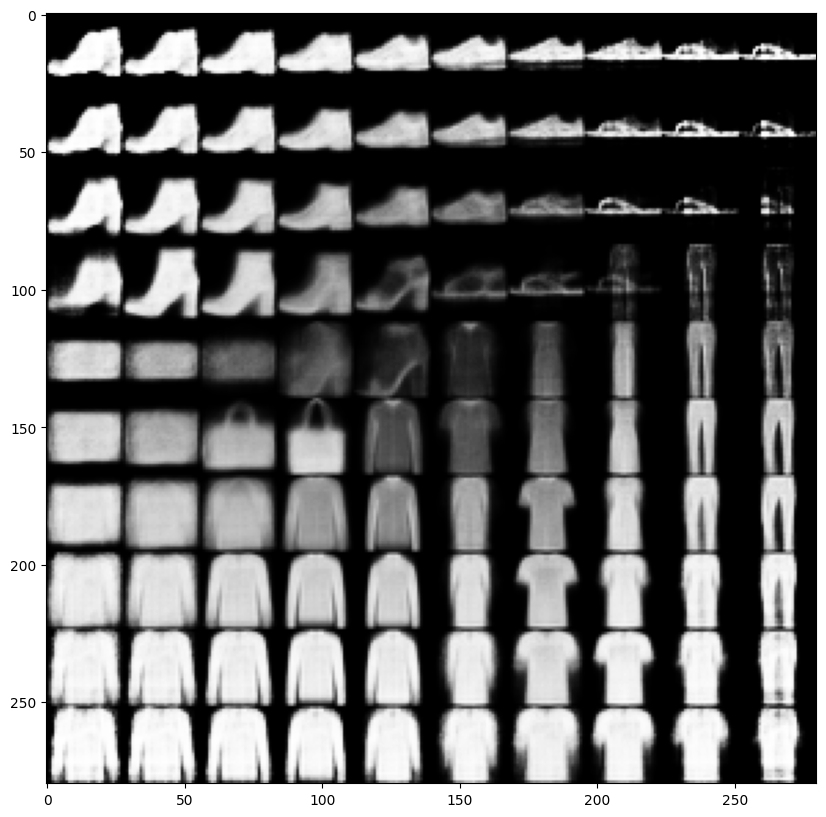

In [ ]:
# Display a 2D manifold of the digits
n = 10  # figure with 15x15 digits
digit_size = 28
scale = 2.0
figsize = 15
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-scale, scale, n)
grid_y = np.linspace(-scale, scale, n)[::-1]

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='gray')
plt.show()

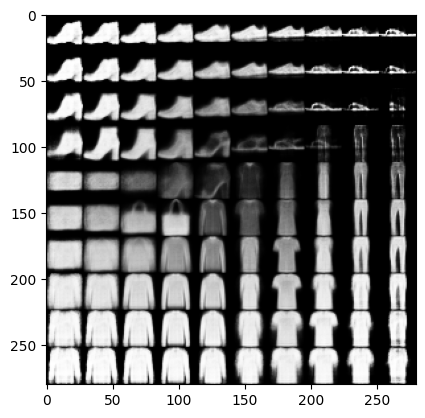

In [ ]:
plt.imshow(figure, cmap='gray')
plt.show()

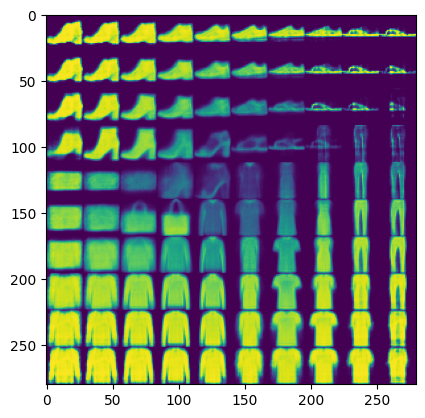

In [ ]:
plt.imshow(figure)
plt.show()

313/313 [==============================] - 1s 2ms/step


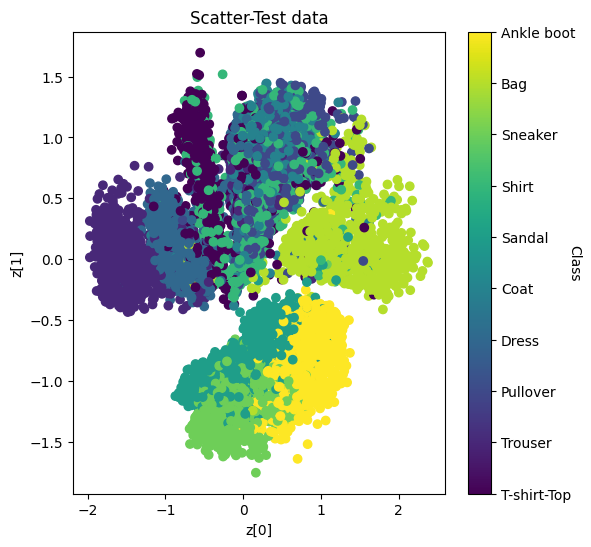

In [ ]:
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
#plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.scatter(x_test_encoded[2][:, 0], x_test_encoded[2][:, 1], c=y_test)
cbar = plt.colorbar(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
cbar.set_ticklabels(['T-shirt-Top', 'Trouser', 'Pullover', 'Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'])
cbar.set_label('Class', rotation=270)
plt.title("Scatter-Test data")
plt.ylabel('z[1]')
plt.xlabel('z[0]')
plt.show()

1875/1875 [==============================] - 5s 2ms/step


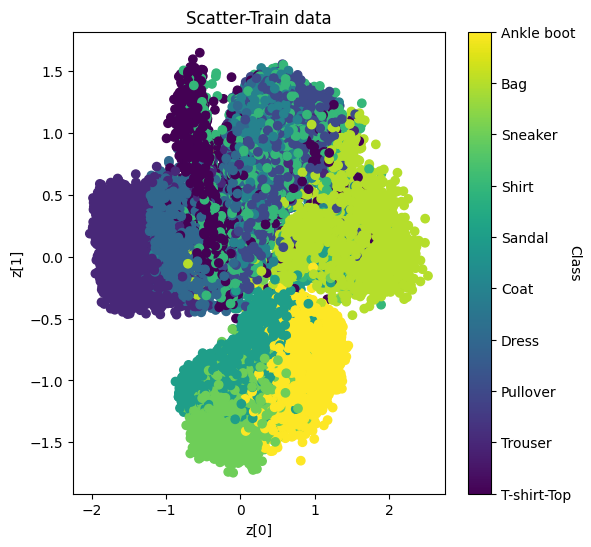

In [ ]:
# Scatter Train data:
x_train_encoded = encoder.predict(x_train, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_train_encoded[2][:, 0], x_train_encoded[2][:, 1], c=y_train)
cbar = plt.colorbar(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
cbar.set_ticklabels(['T-shirt-Top', 'Trouser', 'Pullover', 'Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'])
cbar.set_label('Class', rotation=270)
plt.title("Scatter-Train data")
plt.ylabel('z[1]')
plt.xlabel('z[0]')
plt.show()

### latent_dim = 16 -Dens

In [ ]:
original_dim = 28 * 28 #28
intermediate_dim = 64
latent_dim = 16
batch_size=32
inputs = keras.Input(shape=(original_dim,))
h1 = layers.Dense(512, activation='relu')(inputs)
h1 = BatchNormalization () (h1)
h2 = layers.Dense(256, activation='relu')(h1)
h2 = BatchNormalization () (h2)
h3 = layers.Dense(128, activation='relu')(h2)
h3 = BatchNormalization () (h3)
h4 = layers.Dense(64, activation='relu')(h3)
h4 = BatchNormalization () (h4)
h = layers.Dense(32, activation='relu')(h4)
h = BatchNormalization () (h)

z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

# Create encoder
encoder2 = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')

x1 = layers.Dense(32, activation='relu')(latent_inputs)
x1 = BatchNormalization () (x1)
x2 = layers.Dense(64, activation='relu')(x1)
x2 = BatchNormalization () (x2)
x3 = layers.Dense(128, activation='relu')(x2)
x3 = BatchNormalization () (x3)
x4 = layers.Dense(256, activation='relu')(x3)
x4 = BatchNormalization () (x4)
x = layers.Dense(512, activation='relu')(x4)
x = BatchNormalization () (x)

outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder2 = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder2(encoder2(inputs)[2])
vae2 = keras.Model(inputs, outputs, name='vae_mlp')

reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae2.add_loss(vae_loss)
vae2.compile(optimizer='adam',metrics=['accuracy','mse'])

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

historyvae2= vae2.fit(x_train, x_train,epochs=10,batch_size=32,validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 50s 22ms/step - loss: 267.5727 - accuracy: 0.0134 - mse: 0.0322 - val_loss: 243.3615 - val_accuracy: 0.0186 - val_mse: 0.0217
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 246.4366 - accuracy: 0.0163 - mse: 0.0237 - val_loss: 238.1577 - val_accuracy: 0.0190 - val_mse: 0.0194
Epoch 3/10
1875/1875 [==============================] - 25s 14ms/step - loss: 242.0616 - accuracy: 0.0194 - mse: 0.0218 - val_loss: 235.4313 - val_accuracy: 0.0233 - val_mse: 0.0182
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 238.8664 - accuracy: 0.0207 - mse: 0.0204 - val_loss: 233.4125 - val_accuracy: 0.0255 - val_mse: 0.0175
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 236.8857 - accuracy: 0.0224 - mse: 0.0195 - val_loss: 231.4458 - val_accuracy: 0.0238 - val_mse: 0.0165
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 235.2780 - a

In [ ]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

x_train_encoded52 = encoder2.predict(x_train)
x_test_encoded52 = encoder2.predict(x_test)

x_train_encoded52 = x_train_encoded52[2]
x_test_encoded52 = x_test_encoded52[2]

k_values = [1,3,5,7] #
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_encoded52, (y_train))
    acc = knn.score(x_test_encoded52, (y_test))
    std = np.std(knn.predict(x_test_encoded52) == (y_test))
    print(f'KNN (k={k}, latent_dimension={latent_dim}): Accuracy = {acc:.4f}, Std = {std:.4f}')

313/313 [==============================] - 1s 3ms/step
KNN (k=1, latent_dimension=16): Accuracy = 0.8157, Std = 0.3877
KNN (k=3, latent_dimension=16): Accuracy = 0.8364, Std = 0.3699
KNN (k=5, latent_dimension=16): Accuracy = 0.8487, Std = 0.3583
KNN (k=7, latent_dimension=16): Accuracy = 0.8494, Std = 0.3577


In [ ]:
from sklearn.metrics import classification_report
k_values = [1,3,5,7]
best_accuracy = 0
best_k = None
best_classification_report = None

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_encoded52, (y_train))
    acc = knn.score(x_test_encoded52, (y_test))
    std = np.std(knn.predict(x_test_encoded52) == (y_test))

    # Classification report
    y_pred = knn.predict(x_test_encoded52)
    report = classification_report(y_test, y_pred)

    if acc > best_accuracy:
        best_accuracy = acc
        best_k = k
        best_classification_report = report

    print(f'KNN (k={k}, latent_dimension={latent_dimension}): Accuracy = {acc:.4f}, Std = {std:.4f}')
    print('Classification Report:')
    print(report)


KNN (k=1, latent_dimension=32): Accuracy = 0.8157, Std = 0.3877
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.75      1000
           1       0.97      0.96      0.96      1000
           2       0.71      0.70      0.70      1000
           3       0.84      0.83      0.83      1000
           4       0.69      0.69      0.69      1000
           5       0.94      0.90      0.92      1000
           6       0.53      0.55      0.54      1000
           7       0.87      0.91      0.89      1000
           8       0.97      0.96      0.96      1000
           9       0.90      0.91      0.91      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

KNN (k=3, latent_dimension=32): Accuracy = 0.8364, Std = 0.3699
Classification Report:
              precision    recall  f1-score   support

           0

In [ ]:
print(f'Best Accuracy: {best_accuracy:.4f} achieved with K={best_k}')
print('Best Classification Report:')
print(best_classification_report)


Best Accuracy: 0.8494 achieved with K=7
Best Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.80      1000
           1       0.98      0.96      0.97      1000
           2       0.75      0.78      0.77      1000
           3       0.87      0.86      0.87      1000
           4       0.74      0.76      0.75      1000
           5       0.96      0.90      0.93      1000
           6       0.65      0.56      0.60      1000
           7       0.90      0.92      0.91      1000
           8       0.97      0.97      0.97      1000
           9       0.91      0.94      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



### latent_dim = 16 -Dens

1/1 [==============================] - 0s 22ms/step


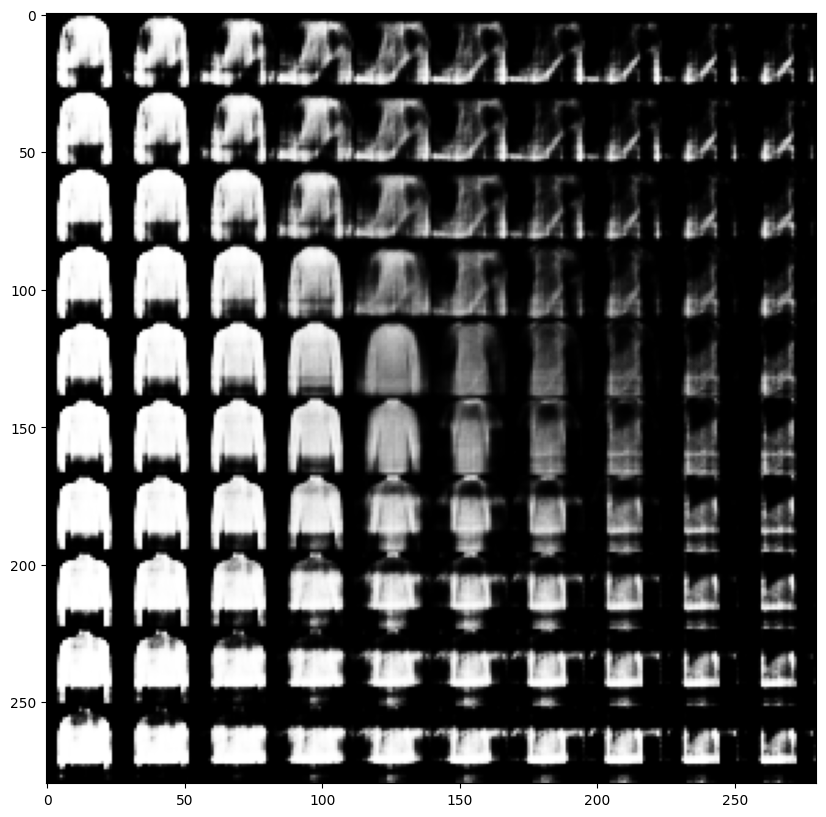

In [ ]:
n = 10  #
digit_size = 28
scale = 2.0
figsize = 15
figure = np.zeros((digit_size * n, digit_size * n))

grid_x = np.linspace(-scale, scale, n)
grid_y = np.linspace(-scale, scale, n)[::-1]

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample =  np.array([xi, yi] * 8)
        x_decoded = decoder2.predict(np.reshape(z_sample, (1, 16)))
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='gray')
plt.show()

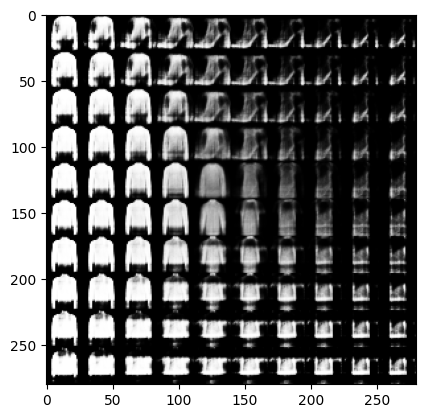

In [ ]:
plt.imshow(figure, cmap='gray')
plt.show()

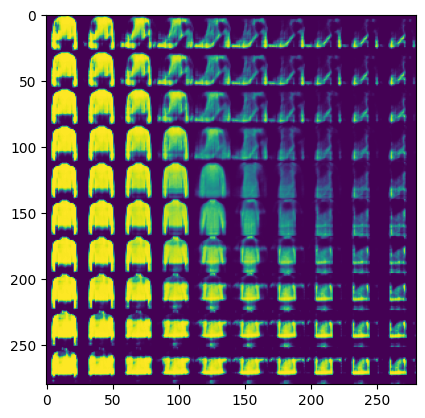

In [ ]:
plt.imshow(figure)
plt.show()

313/313 [==============================] - 2s 4ms/step


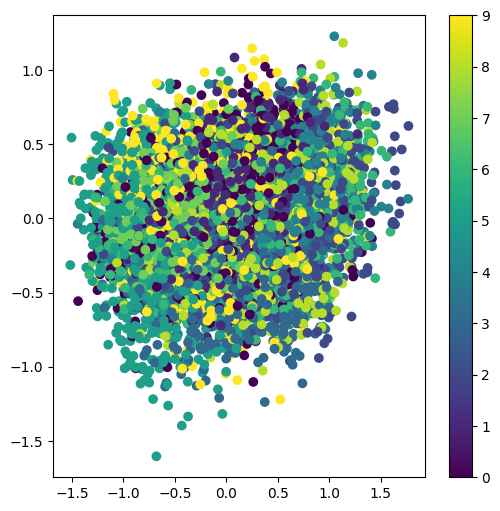

In [ ]:
x_test_encoded2 = encoder2.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded2[2][:, 0], x_test_encoded2[2][:, 1], c=y_test)
cbar = plt.colorbar(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
cbar.set_ticklabels(['T-shirt-Top', 'Trouser', 'Pullover', 'Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'])
cbar.set_label('Class', rotation=270)
plt.title("Scatter-Test data")
plt.ylabel('z[1]')
plt.xlabel('z[0]')
plt.show()

1875/1875 [==============================] - 6s 3ms/step


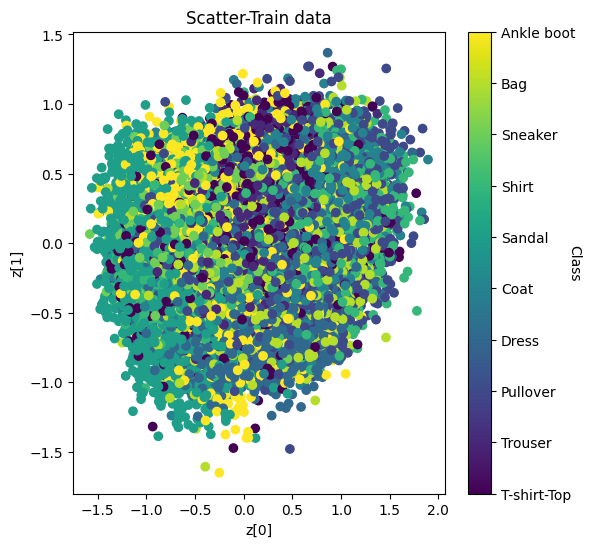

In [ ]:
# Scatter Train data:
x_train_encoded2 = encoder2.predict(x_train, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_train_encoded2[2][:, 0], x_train_encoded2[2][:, 1], c=y_train)
cbar = plt.colorbar(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
cbar.set_ticklabels(['T-shirt-Top', 'Trouser', 'Pullover', 'Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'])
cbar.set_label('Class', rotation=270)
plt.title("Scatter-Train data")
plt.ylabel('z[1]')
plt.xlabel('z[0]')
plt.show()

### latent_dim = 2 - Conv

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
class sampling(layers.Layer):

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

latent_dim = 2
encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32,3,activation="relu",strides=2,padding="same")(encoder_inputs)
x = layers.Conv2D(64,3,activation="relu",strides=2,padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim,name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
#encoder.summary()

latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7*7*64, activation="relu")(latent_inputs)
x = layers.Reshape((7,7,64))(x)
x = layers.Conv2DTranspose(64,3,activation="relu",strides=2,padding="same")(x)
x = layers.Conv2DTranspose(32,3,activation="relu",strides=2,padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1,3,activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
#decoder.summary()

class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255.0

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=10, batch_size=128)

Epoch 1/10
547/547 [==============================] - 9s 9ms/step - loss: 379.4673 - reconstruction_loss: 318.6734 - kl_loss: 7.6399
Epoch 2/10
547/547 [==============================] - 4s 8ms/step - loss: 280.3043 - reconstruction_loss: 270.7523 - kl_loss: 7.9399
Epoch 3/10
547/547 [==============================] - 6s 11ms/step - loss: 275.8480 - reconstruction_loss: 266.9552 - kl_loss: 7.7929
Epoch 4/10
547/547 [==============================] - 7s 14ms/step - loss: 273.1492 - reconstruction_loss: 265.1674 - kl_loss: 7.7354
Epoch 5/10
547/547 [==============================] - 8s 14ms/step - loss: 272.0529 - reconstruction_loss: 263.8709 - kl_loss: 7.7068
Epoch 6/10
547/547 [==============================] - 6s 11ms/step - loss: 270.8030 - reconstruction_loss: 263.0788 - kl_loss: 7.6904
Epoch 7/10
547/547 [==============================] - 6s 11ms/step - loss: 270.2431 - reconstruction_loss: 262.1927 - kl_loss: 7.6732
Epoch 8/10
547/547 [==============================] - 5s 8ms/ste

In [ ]:
x_train_encoded55 = encoder.predict(x_train)
x_test_encoded55 = encoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
x_train_encoded5 = x_train_encoded55[2]
x_test_encoded5 = x_test_encoded55[2]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_values = [1,3,5,7] # Change this list to experiment with different k values
#x_train_encoded5 = np.array(x_train_encoded5)
#x_test_encoded5 = np.array(x_test_encoded5)
#x_train_encoded5 = x_train_encoded5.reshape(x_train_encoded5.shape[0], -1)
#x_test_encoded5 = x_test_encoded5.reshape(x_test_encoded5.shape[0], -1)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_encoded5, (y_train))
    acc = knn.score(x_test_encoded5, (y_test))
    std = np.std(knn.predict(x_test_encoded5) == (y_test))
    print(f'KNN (k={k}, latent_dimension={latent_dim}): Accuracy = {acc:.4f}, Std = {std:.4f}')

KNN (k=1, latent_dimension=2): Accuracy = 0.2839, Std = 0.4509
KNN (k=3, latent_dimension=2): Accuracy = 0.3122, Std = 0.4634
KNN (k=5, latent_dimension=2): Accuracy = 0.3217, Std = 0.4671
KNN (k=7, latent_dimension=2): Accuracy = 0.3251, Std = 0.4684


In [ ]:
from sklearn.metrics import classification_report
k_values = [1,3,5,7]
best_accuracy = 0
best_k = None
best_classification_report = None

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_encoded5, (y_train))
    acc = knn.score(x_test_encoded5, (y_test))
    std = np.std(knn.predict(x_test_encoded5) == (y_test))

    # Classification report
    y_pred = knn.predict(x_test_encoded5)
    report = classification_report(y_test, y_pred)

    if acc > best_accuracy:
        best_accuracy = acc
        best_k = k
        best_classification_report = report

    print(f'KNN (k={k}, latent_dimension={latent_dimension}): Accuracy = {acc:.4f}, Std = {std:.4f}')
    print('Classification Report:')
    print(report)


KNN (k=1, latent_dimension=32): Accuracy = 0.2839, Std = 0.4509
Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.18      0.19      1000
           1       0.32      0.31      0.31      1000
           2       0.15      0.15      0.15      1000
           3       0.14      0.14      0.14      1000
           4       0.16      0.16      0.16      1000
           5       0.38      0.36      0.37      1000
           6       0.15      0.15      0.15      1000
           7       0.55      0.58      0.57      1000
           8       0.18      0.18      0.18      1000
           9       0.62      0.62      0.62      1000

    accuracy                           0.28     10000
   macro avg       0.28      0.28      0.28     10000
weighted avg       0.28      0.28      0.28     10000

KNN (k=3, latent_dimension=32): Accuracy = 0.3122, Std = 0.4634
Classification Report:
              precision    recall  f1-score   support

           0

In [ ]:
print(f'Best Accuracy: {best_accuracy:.4f} achieved with K={best_k}')
print('Best Classification Report:')
print(best_classification_report)


Best Accuracy: 0.3251 achieved with K=7
Best Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.35      0.26      1000
           1       0.35      0.43      0.39      1000
           2       0.14      0.16      0.15      1000
           3       0.14      0.13      0.14      1000
           4       0.18      0.14      0.16      1000
           5       0.46      0.44      0.45      1000
           6       0.15      0.11      0.12      1000
           7       0.61      0.63      0.62      1000
           8       0.27      0.12      0.17      1000
           9       0.66      0.74      0.70      1000

    accuracy                           0.33     10000
   macro avg       0.32      0.33      0.31     10000
weighted avg       0.32      0.33      0.31     10000



### latent_dim = 2 - Conv

1/1 [==============================] - 0s 20ms/step


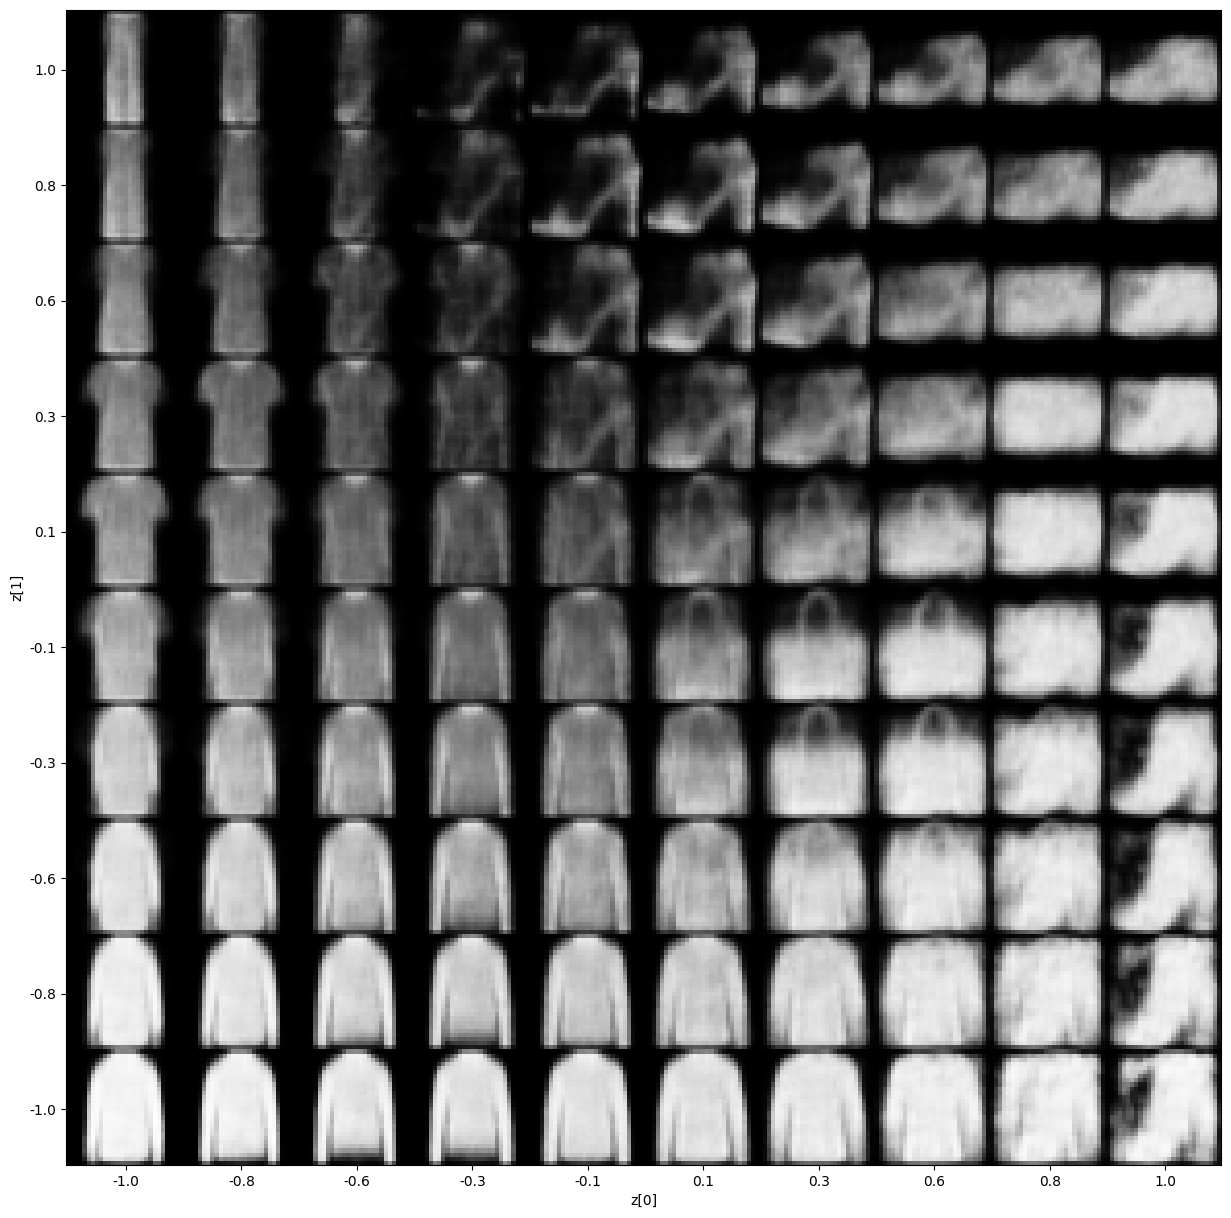

In [ ]:
import matplotlib.pyplot as plt

def plotlatentpic(vae, n=10, figsize=15):
    digit_size =28
    scale=1.0
    figure=np.zeros((digit_size* n, digit_size* n))
    grid_x=np.linspace(-scale, scale, n)
    grid_y=np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample =np.array([[xi, yi]])
            x_decoded= vae.decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i* digit_size:(i + 1)* digit_size,
                j *digit_size:(j + 1) *digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range =digit_size // 2
    end_range= n* digit_size + start_range
    pixel_range= np.arange(start_range, end_range, digit_size)
    sample_range_x= np.round(grid_x,1)
    sample_range_y= np.round(grid_y,1)
    plt.xticks(pixel_range,sample_range_x)
    plt.yticks(pixel_range,sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plotlatentpic(vae)

In [ ]:
def plot_label_clusters(vae, data, labels):
    z_mean, _, _ = vae.encoder.predict(data)
    plt.figure(figsize=(15, 15))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.title("Scatter-Train data")
    plt.show()


(x_train, y_train), _ = keras.datasets.fashion_mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255.0

plot_label_clusters(vae, x_train, y_train)

313/313 [==============================] - 2s 3ms/step


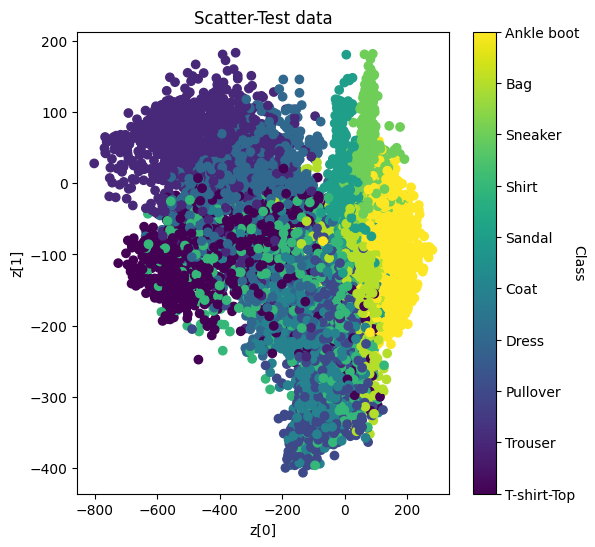

In [ ]:
x_test_encoded = encoder.predict(x_test, batch_size=32)
plt.figure(figsize=(6, 6))
#plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.scatter(x_test_encoded[2][:, 0], x_test_encoded[2][:, 1], c=y_test)
cbar = plt.colorbar(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
cbar.set_ticklabels(['T-shirt-Top', 'Trouser', 'Pullover', 'Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'])
cbar.set_label('Class', rotation=270)
plt.title("Scatter-Test data")
plt.ylabel('z[1]')
plt.xlabel('z[0]')
plt.show()

1875/1875 [==============================] - 6s 3ms/step


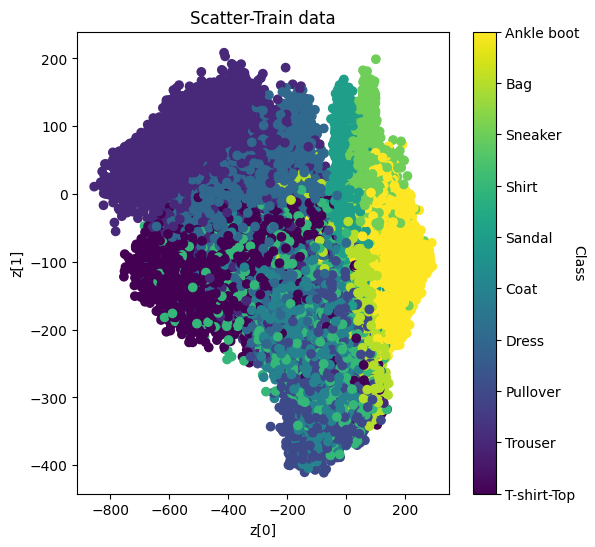

In [ ]:
# Scatter Train data:
x_train_encoded = encoder.predict(x_train, batch_size=32)
plt.figure(figsize=(6,6))
plt.scatter(x_train_encoded[2][:, 0], x_train_encoded[2][:, 1], c=y_train)
cbar = plt.colorbar(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
cbar.set_ticklabels(['T-shirt-Top', 'Trouser', 'Pullover', 'Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'])
cbar.set_label('Class',rotation=270)
plt.title("Scatter-Train data")
plt.ylabel('z[1]')
plt.xlabel('z[0]')
plt.show()

### latent_dim = 16 - Conv

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
class sampling(layers.Layer):

    def call(self, inputs):
        z_mean,z_log_var= inputs
        batch=tf.shape(z_mean)[0]
        dim=tf.shape(z_mean)[1]
        epsilon=tf.random.normal(shape=(batch,dim))
        return z_mean+ tf.exp(0.5*z_log_var)*epsilon

latent_dim =16
encoder_inputs=keras.Input(shape=(28, 28, 1))
x=layers.Conv2D(32, 3,activation="relu", padding="same")(encoder_inputs)
x=layers.Conv2D(64,3,activation="relu", padding="same")(x)
x=layers.Flatten()(x)
x=layers.Dense(16,activation="relu")(x)
z_mean=layers.Dense(latent_dim, name="z_mean")(x)
z_log_var=layers.Dense(latent_dim, name="z_log_var")(x)
z=sampling()([z_mean,z_log_var])
encoder=keras.Model(encoder_inputs, [z_mean, z_log_var,z],name="encoder")

latent_inputs=keras.Input(shape=(latent_dim,))
x=layers.Dense(7*7*64, activation="relu")(latent_inputs)
x=layers.Reshape((7,7,64))(x)
x=layers.Conv2DTranspose(32,3,strides=2, activation="relu", padding="same")(x)
x=layers.Conv2DTranspose(64,3,strides=2, activation="relu", padding="same")(x)
decoder_outputs= layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder= keras.Model(latent_inputs, decoder_outputs, name="decoder")

class VAE(keras.Model):
    def __init__(self,encoder,decoder,**kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker= keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker= keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                keras.losses.binary_crossentropy(data, reconstruction)
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255.0

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=10, batch_size=128)

Epoch 1/10
547/547 [==============================] - 12s 14ms/step - loss: 0.5419 - reconstruction_loss: 0.5044 - kl_loss: 0.0019
Epoch 2/10
547/547 [==============================] - 7s 14ms/step - loss: 0.4921 - reconstruction_loss: 0.4923 - kl_loss: 2.9892e-07
Epoch 3/10
547/547 [==============================] - 7s 13ms/step - loss: 0.4915 - reconstruction_loss: 0.4916 - kl_loss: 2.3884e-07
Epoch 4/10
547/547 [==============================] - 7s 14ms/step - loss: 0.4912 - reconstruction_loss: 0.4913 - kl_loss: 2.1483e-07
Epoch 5/10
547/547 [==============================] - 7s 14ms/step - loss: 0.4908 - reconstruction_loss: 0.4912 - kl_loss: 2.9399e-07
Epoch 6/10
547/547 [==============================] - 7s 13ms/step - loss: 0.4912 - reconstruction_loss: 0.4910 - kl_loss: 2.2431e-07
Epoch 7/10
547/547 [==============================] - 8s 14ms/step - loss: 0.4906 - reconstruction_loss: 0.4910 - kl_loss: 2.7988e-07
Epoch 8/10
547/547 [==============================] - 7s 14ms/ste

In [ ]:
x_train_encoded55 = encoder.predict(x_train)
x_test_encoded55 = encoder.predict(x_test)

x_train_encoded5 = x_train_encoded55[2]
x_test_encoded5 = x_test_encoded55[2]

313/313 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_values = [1,3,5,7] #
#x_train_encoded5 = np.array(x_train_encoded5)
#x_test_encoded5 = np.array(x_test_encoded5)
#x_train_encoded5 = x_train_encoded5.reshape(x_train_encoded5.shape[0], -1)
#x_test_encoded5 = x_test_encoded5.reshape(x_test_encoded5.shape[0], -1)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_encoded5, (y_train))
    acc = knn.score(x_test_encoded5, (y_test))
    std = np.std(knn.predict(x_test_encoded5) == (y_test))
    print(f'KNN (k={k}, latent_dimension={latent_dim}): Accuracy = {acc:.4f}, Std = {std:.4f}')

KNN (k=1, latent_dimension=16): Accuracy = 0.0984, Std = 0.2979
KNN (k=3, latent_dimension=16): Accuracy = 0.1035, Std = 0.3046
KNN (k=5, latent_dimension=16): Accuracy = 0.1004, Std = 0.3005
KNN (k=7, latent_dimension=16): Accuracy = 0.0985, Std = 0.2980


In [ ]:
from sklearn.metrics import classification_report
k_values =[1,3,5,7]
best_accuracy = 0
best_k = None
best_classification_report= None

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
    knn.fit(x_train_encoded5, y_train)
    acc = knn.score(x_test_encoded5, y_test)
    std = np.std(knn.predict(x_test_encoded5) == y_test)

    # Classification report
    y_pred = knn.predict(x_test_encoded5)
    report = classification_report(y_test,y_pred)

    if acc > best_accuracy:
        best_accuracy = acc
        best_k=k
        best_classification_report= report

    print(f'KNN (k={k}, latent_dimension={latent_dimension}): Accuracy = {acc:.4f}, Std = {std:.4f}')
    print('Classification Report:')
    print(report)


KNN (k=1, latent_dimension=32): Accuracy = 0.0984, Std = 0.2979
Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.09      0.09      1000
           1       0.09      0.09      0.09      1000
           2       0.12      0.11      0.11      1000
           3       0.09      0.09      0.09      1000
           4       0.08      0.08      0.08      1000
           5       0.10      0.10      0.10      1000
           6       0.09      0.09      0.09      1000
           7       0.10      0.10      0.10      1000
           8       0.10      0.10      0.10      1000
           9       0.11      0.12      0.11      1000

    accuracy                           0.10     10000
   macro avg       0.10      0.10      0.10     10000
weighted avg       0.10      0.10      0.10     10000

KNN (k=3, latent_dimension=32): Accuracy = 0.1035, Std = 0.3046
Classification Report:
              precision    recall  f1-score   support

           0

In [ ]:
print(f'Best Accuracy: {best_accuracy:.4f} achieved with K={best_k}')
print('Best Classification Report:')
print(best_classification_report)


Best Accuracy: 0.1035 achieved with K=3
Best Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.24      0.14      1000
           1       0.11      0.22      0.15      1000
           2       0.10      0.15      0.12      1000
           3       0.11      0.13      0.12      1000
           4       0.10      0.09      0.09      1000
           5       0.08      0.06      0.07      1000
           6       0.09      0.04      0.06      1000
           7       0.12      0.04      0.06      1000
           8       0.10      0.03      0.05      1000
           9       0.11      0.03      0.05      1000

    accuracy                           0.10     10000
   macro avg       0.10      0.10      0.09     10000
weighted avg       0.10      0.10      0.09     10000



### latent_dim = 16 - Conv

1/1 [==============================] - 0s 19ms/step


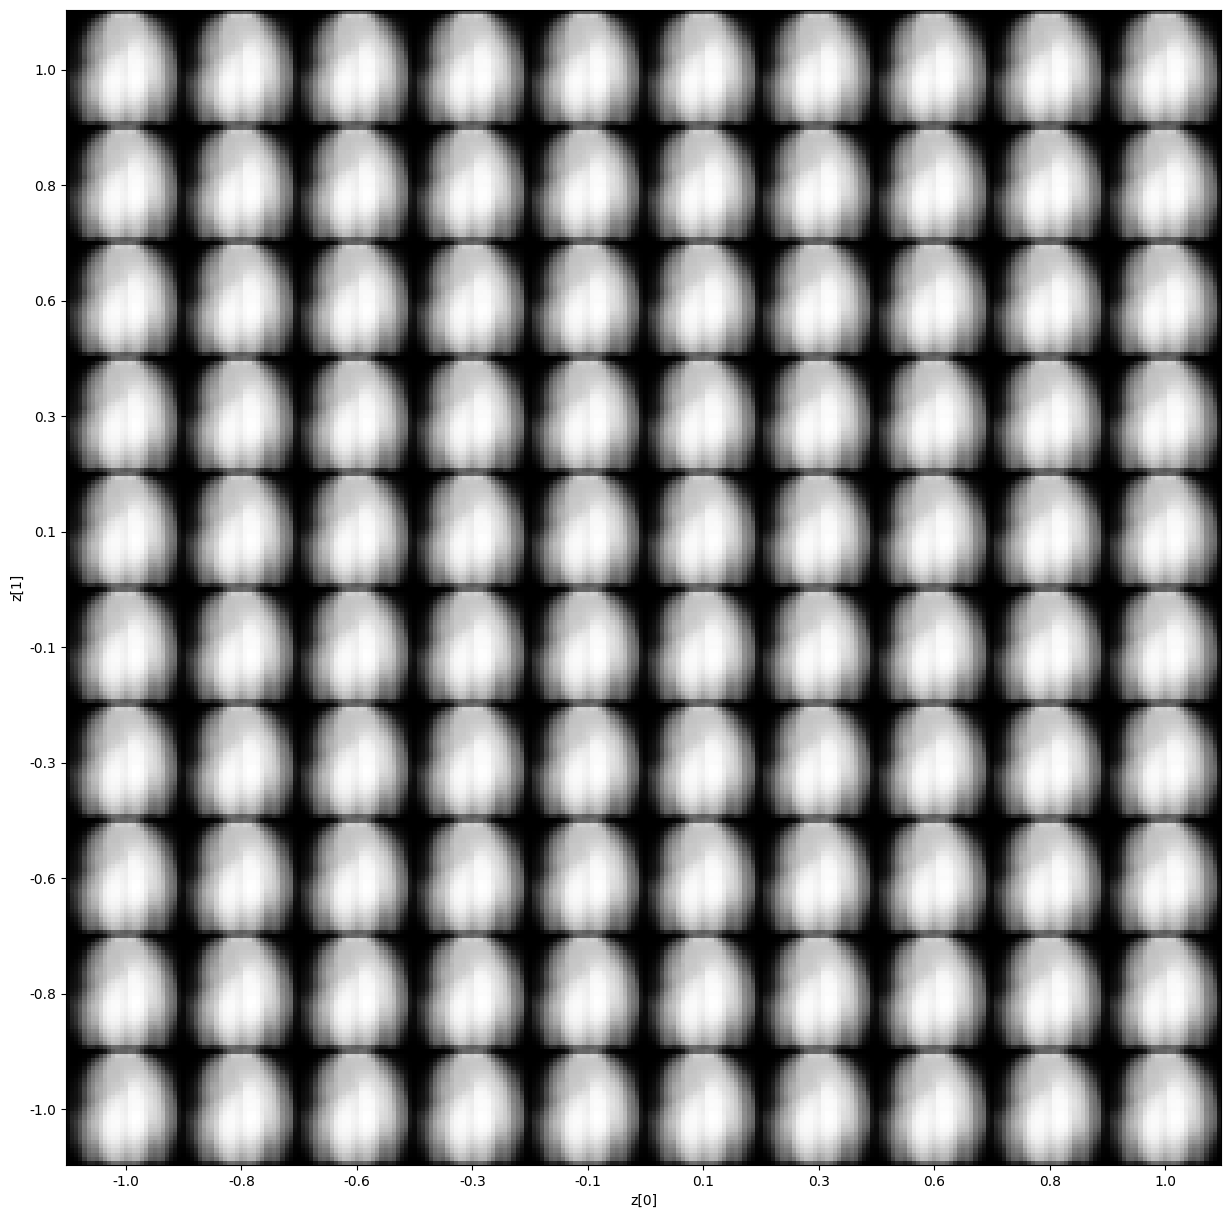

In [ ]:
import matplotlib.pyplot as plt

def plotlatentpic(vae, n=10, figsize=15):
    digit_size=28
    scale=1.0
    figure=np.zeros((digit_size* n,digit_size *n))
    grid_x=np.linspace(-scale,scale,n)
    grid_y=np.linspace(-scale,scale,n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample=np.array([[xi, yi]]* 8)
            x_decoded=vae.decoder.predict(np.reshape(z_sample, (1, 16)))
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range=digit_size // 2
    end_range=n*digit_size + start_range
    pixel_range=np.arange(start_range, end_range, digit_size)
    sample_range_x=np.round(grid_x,1)
    sample_range_y=np.round(grid_y,1)
    plt.xticks(pixel_range,sample_range_x)
    plt.yticks(pixel_range,sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plotlatentpic(vae)

In [ ]:
def plot_label_clusters(vae, data, labels):
    z_mean, _, _ = vae.encoder.predict(data)
    plt.figure(figsize=(15, 15))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.title("Scatter-Train data")
    plt.show()

313/313 [==============================] - 1s 2ms/step


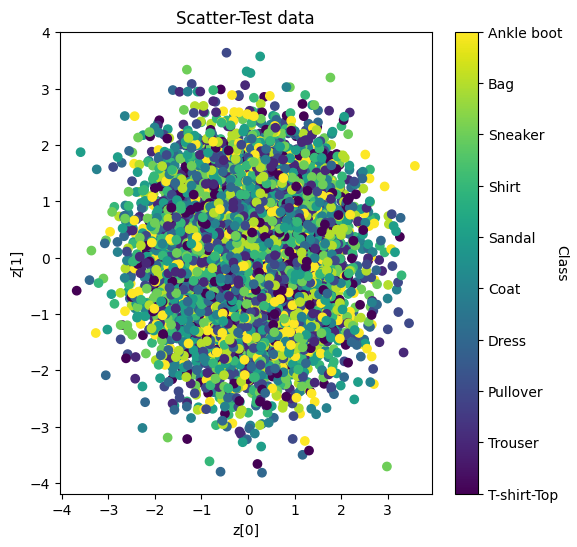

In [ ]:
x_test_encoded = encoder.predict(x_test, batch_size=32)
plt.figure(figsize=(6,6))
plt.scatter(x_test_encoded[2][:,0], x_test_encoded[2][:, 1], c=y_test)
cbar = plt.colorbar(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
cbar.set_ticklabels(['T-shirt-Top', 'Trouser', 'Pullover', 'Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'])
cbar.set_label('Class', rotation=270)
plt.title("Scatter-Test data")
plt.ylabel('z[1]')
plt.xlabel('z[0]')
plt.show()

1875/1875 [==============================] - 3s 2ms/step


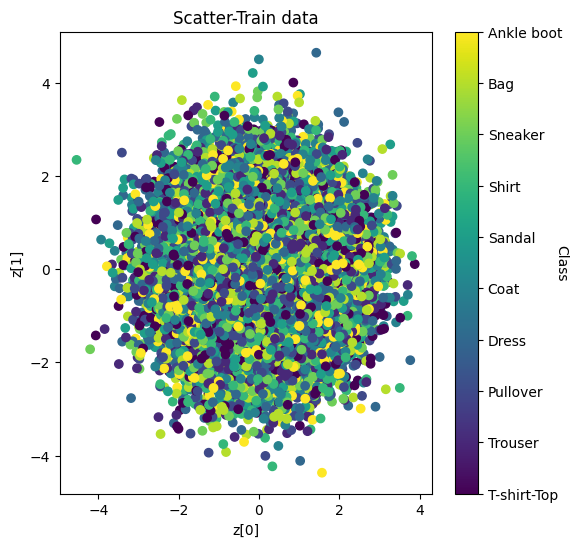

In [ ]:
# Scatter Train data:
x_train_encoded = encoder.predict(x_train, batch_size=32)
plt.figure(figsize=(6, 6))
plt.scatter(x_train_encoded[2][:, 0], x_train_encoded[2][:, 1], c=y_train)
cbar = plt.colorbar(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
cbar.set_ticklabels(['T-shirt-Top', 'Trouser', 'Pullover', 'Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'])
cbar.set_label('Class', rotation=270)
plt.title("Scatter-Train data")
plt.ylabel('z[1]')
plt.xlabel('z[0]')
plt.show()

In [ ]:
#-------------------------------------------------------------------------------------------------------------------